In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.16.1


In [3]:
import pandas as pd
data = pd.read_csv('usethis.csv')


print(data.info())
data.head()
data = data.drop(columns=['index'])
data['Target'] = data['Target'].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14872 entries, 0 to 14871
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        14872 non-null  int64  
 1   High         14872 non-null  float64
 2   Low          14872 non-null  float64
 3   Close        14872 non-null  float64
 4   Volume       14872 non-null  int64  
 5   RSI          14872 non-null  float64
 6   MACD         14872 non-null  float64
 7   MACD_Signal  14872 non-null  float64
 8   MACD_Diff    14872 non-null  float64
 9   Change       14872 non-null  float64
 10  Up           14872 non-null  float64
 11  Down         14872 non-null  float64
 12  Delta_SMA    14872 non-null  float64
 13  Delta_EMA    14872 non-null  float64
 14  Target       14872 non-null  int64  
dtypes: float64(12), int64(3)
memory usage: 1.7 MB
None


In [4]:
data.describe().T

count          mean           std           min           25%  \
High         14872.0  9.753506e+02  1.163066e+03  5.283000e+01  1.040275e+02   
Low          14872.0  9.635541e+02  1.150272e+03  5.135000e+01  1.023375e+02   
Close        14872.0  9.697557e+02  1.157129e+03  5.232000e+01  1.032075e+02   
Volume       14872.0  1.406778e+09  1.840145e+09  1.950000e+06  2.143500e+07   
RSI          14872.0  5.358724e+01  1.260376e+01  1.135964e+01  4.476224e+01   
MACD         14872.0  2.343052e+00  1.663277e+01 -2.370202e+02 -8.138548e-01   
MACD_Signal  14872.0  2.334910e+00  1.556284e+01 -1.986407e+02 -7.236174e-01   
MACD_Diff    14872.0  8.141783e-03  5.211806e+00 -6.122110e+01 -6.010503e-01   
Change       14872.0 -5.115877e-05  1.016113e-02 -2.573386e-01 -4.469798e-03   
Up           14872.0  6.898086e-03  6.937126e-03  3.236181e-06  2.317669e-03   
Down         14872.0 -7.114004e-03  6.267653e-03 -1.016142e-01 -9.345851e-03   
Delta_SMA    14872.0  4.976348e+00  3.579617e+01 -4.231780e+02 -1.782002e+00   
Delta_EMA    14872.0  4.941050e+00  2.539781e+01 -2.592072e+02 -8.720524e-01   
Target       14872.0  1.373050e-01  8.280123e-01 -1.000000e+00 -1.000000e+00   

                      50%           75%           max  
High         4.443550e+02  1.349105e+03  5.447250e+03  
Low          4.399250e+02  1.330343e+03  5.409130e+03  
Close        4.421500e+02  1.339152e+03  5.433740e+03  
Volume       2.446900e+08  3.065368e+09  1.145623e+10  
RSI          5.438591e+01  6.289170e+01  8.586217e+01  
MACD         6.906919e-01  5.265945e+00  9.258371e+01  
MACD_Signal  6.699558e-01  5.074898e+00  8.188411e+01  
MACD_Diff    9.206230e-03  6.194650e-01  6.089580e+01  
Change       2.527297e-04  4.813874e-03  1.037823e-01  
Up           5.476379e-03  9.261820e-03  2.573386e-01  
Down        -5.827750e-03 -3.144633e-03 -3.780052e-06  
Delta_SMA    1.384200e+00  1.092037e+01  2.014590e+02  
Delta_EMA    1.390095e+00  1.006106e+01  1.282973e+02  
Target       0.000000e+00  1.000000e+00  1.000000e+00

In [4]:
X = data.drop('Target', axis=1)
y = data['Target']

In [5]:
len = data.shape[0]
len

14872

In [6]:
#set ratio
ratio = 0.75
X_train = X[X.index <=len*ratio]
X_test = X[X.index>len*ratio]
y_train = y[y.index <=len*ratio]
y_test = y[y.index >len*ratio]

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.feature_selection import RFECV
from imblearn.pipeline import Pipeline as imbpipeline
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA


In [8]:
class multiple_training2():
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.methods = []
        self.models = []
        self.feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"feature_{i}" for i in range(X_train.shape[1])]

    def report(self):
        for num, model in enumerate(self.models):
            print(self.methods[num])
            ypred = model.predict(self.X_test)

            # Classification report
            print(classification_report(self.y_test, ypred))

            # Confusion matrix
            cf_matrix = confusion_matrix(self.y_test, ypred)
            plt.figure(figsize=(5, 3))
            sns.heatmap(cf_matrix, annot=True, annot_kws={"size": 15}, cmap="Spectral")
            plt.ylabel('True')
            plt.xlabel('Predicted')
            plt.show()

            # Feature importance
            if hasattr(model.best_estimator_, 'feature_importances_'):
                importances = model.best_estimator_.feature_importances_
                self.plot_feature_importance(importances, self.feature_names, title=f"Feature Importance for {self.methods[num]}")
            elif hasattr(model.best_estimator_, 'coef_'):
                importances = model.best_estimator_.coef_[0]
                self.plot_feature_importance(importances, self.feature_names, title=f"Feature Importance for {self.methods[num]}")

    def plot_feature_importance(self, importances, feature_names, title="Feature Importance"):
        indices = np.argsort(importances)[::-1]
        plt.figure(figsize=(12, 6))
        plt.title(title)
        plt.bar(range(len(importances)), importances[indices], align='center')
        plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
        plt.tight_layout()
        plt.show()

    def plot_learning_curve(self, estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
        plt.figure()
        plt.title(title)
        plt.xlabel("Training examples")
        plt.ylabel("Score")

        train_sizes, train_scores, test_scores = learning_curve(
            estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1_macro')

        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")

        plt.legend(loc="best")
        plt.show()

    def run(self):
        self.methods = [method for method in dir(self) if callable(getattr(self, method)) and method.startswith("model")]
        print(self.methods)
        self.models = [getattr(self, method_name)() for method_name in self.methods]

    def plot_all_learning_curves(self):
        for num, model in enumerate(self.models):
            self.plot_learning_curve(model.best_estimator_, f"Learning Curve for {self.methods[num]}", self.X_train, self.y_train, cv=5, n_jobs=-1)

    def model_Logistic(self):
        pipe_Logistic = imbpipeline([
            ('scaler', StandardScaler()),
            ('Logistic', LogisticRegression(random_state=2024, max_iter=2000, solver='lbfgs'))
        ])
        grid_params_Logistic = {'Logistic__C': [1, 2, 3, 4], 'Logistic__solver': ['newton-cg', 'lbfgs']}
        self.CV_Logistic = GridSearchCV(estimator=pipe_Logistic, param_grid=grid_params_Logistic, cv=5, scoring='f1_macro', verbose=1, n_jobs=1)
        self.CV_Logistic.fit(self.X_train, self.y_train)
        return self.CV_Logistic

    def model_KNN(self):
        pipe_KNNclass = imbpipeline([
            ('scaler', StandardScaler()),
            ('KNNclass', KNeighborsClassifier())
        ])
        grid_params_KNNclass = {'KNNclass__n_neighbors': [i for i in range(1, 7)]}
        self.CV_KNNclass = GridSearchCV(estimator=pipe_KNNclass, param_grid=grid_params_KNNclass, cv=5, scoring='f1_macro', verbose=1)
        self.CV_KNNclass.fit(self.X_train, self.y_train)
        print(f"Best k for KNN: {self.CV_KNNclass.best_params_['KNNclass__n_neighbors']}")
        return self.CV_KNNclass

    def model_SVC(self):
        pipe_SVC = imbpipeline([
            ('scaler', StandardScaler()),  # Reduce dimensionality
            ('SVC', SVC(max_iter=5000))  # Further increased max_iter
        ])
        grid_params_SVC = {'SVC__C': [0.1, 1, 10, 100], 'SVC__kernel': ['linear', 'rbf','poly']}
        self.CV_SVC = GridSearchCV(estimator=pipe_SVC, param_grid=grid_params_SVC, cv=3, scoring='f1_macro', verbose=1)
        self.CV_SVC.fit(self.X_train, self.y_train)
        return self.CV_SVC

    
    def model_DecisionTree(self):
        pipe_DecisionTree = imbpipeline([
            ('scaler', StandardScaler()),
            ('DecisionTree', DecisionTreeClassifier(random_state=2024))
        ])
        grid_params_DecisionTree = {
            'DecisionTree__max_depth': [None, 10, 20, 30, 40, 50],
            'DecisionTree__min_samples_split': [2, 5, 10],
            'DecisionTree__min_samples_leaf': [1, 2, 4]
        }
        self.CV_DecisionTree = GridSearchCV(estimator=pipe_DecisionTree, param_grid=grid_params_DecisionTree, cv=5, scoring='f1_macro', verbose=1)
        self.CV_DecisionTree.fit(self.X_train, self.y_train)
        return self.CV_DecisionTree

    # def model_NaiveBayes(self):
    #     pipe_NaiveBayes = imbpipeline([
    #         ('scaler', StandardScaler()),
    #         ('NaiveBayes', GaussianNB())
    #     ])
    #     self.CV_NaiveBayes = pipe_NaiveBayes
    #     self.CV_NaiveBayes.fit(self.X_train, self.y_train)
    #     return self.CV_NaiveBayes

    def model_RandomForest(self):
        pipe_RandomForest = imbpipeline([
            ('scaler', StandardScaler()),
            ('RandomForest', RandomForestClassifier(random_state=2024))
        ])
        grid_params_RandomForest = {'RandomForest__n_estimators': [100, 200, 300], 'RandomForest__max_depth': [None, 10, 20, 30]}
        self.CV_RandomForest = GridSearchCV(estimator=pipe_RandomForest, param_grid=grid_params_RandomForest, cv=5, scoring='f1_macro', verbose=1)
        self.CV_RandomForest.fit(self.X_train, self.y_train)
        return self.CV_RandomForest

    # def model_GradientBoosting(self):
    #     pipe_GradientBoosting = imbpipeline([
    #         ('scaler', StandardScaler()),
    #         ('GradientBoosting', GradientBoostingClassifier(random_state=2024))
    #     ])
    #     grid_params_GradientBoosting = {'GradientBoosting__n_estimators': [100, 200, 300], 'GradientBoosting__learning_rate': [0.01, 0.1, 0.2], 'GradientBoosting__max_depth': [3, 5, 7]}
    #     self.CV_GradientBoosting = GridSearchCV(estimator=pipe_GradientBoosting, param_grid=grid_params_GradientBoosting, cv=5, scoring='f1_macro', verbose=1)
    #     self.CV_GradientBoosting.fit(self.X_train, self.y_train)
    #     return self.CV_GradientBoosting


In [9]:
instance2 = multiple_training2(X_train, y_train, X_test, y_test)
instance2.run() #train all model
instance2.models

['model_DecisionTree', 'model_KNN', 'model_Logistic', 'model_RandomForest', 'model_SVC']
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best k for KNN: 1
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundat

[GridSearchCV(cv=5,
              estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                        ('DecisionTree',
                                         DecisionTreeClassifier(random_state=2024))]),
              param_grid={'DecisionTree__max_depth': [None, 10, 20, 30, 40, 50],
                          'DecisionTree__min_samples_leaf': [1, 2, 4],
                          'DecisionTree__min_samples_split': [2, 5, 10]},
              scoring='f1_macro', verbose=1),
 GridSearchCV(cv=5,
              estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                        ('KNNclass', KNeighborsClassifier())]),
              param_grid={'KNNclass__n_neighbors': [1, 2, 3, 4, 5, 6]},
              scoring='f1_macro', verbose=1),
 GridSearchCV(cv=5,
              estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                        ('Logistic',
                                         LogisticRegression(max

model_DecisionTree
              precision    recall  f1-score   support

          -1       0.23      0.61      0.33       877
           0       0.23      0.16      0.19      1096
           1       0.51      0.17      0.25      1744

    accuracy                           0.27      3717
   macro avg       0.32      0.31      0.26      3717
weighted avg       0.36      0.27      0.25      3717



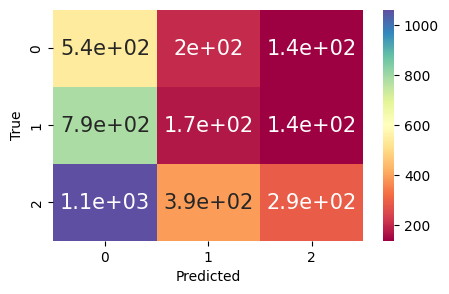

model_KNN
              precision    recall  f1-score   support

          -1       0.26      0.55      0.35       877
           0       0.32      0.31      0.32      1096
           1       0.54      0.23      0.33      1744

    accuracy                           0.33      3717
   macro avg       0.37      0.37      0.33      3717
weighted avg       0.41      0.33      0.33      3717



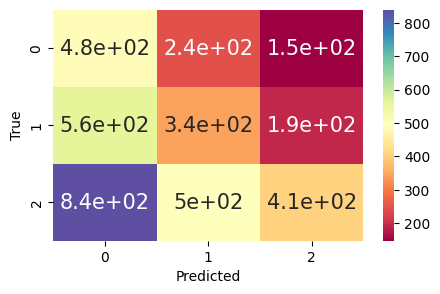

model_Logistic
              precision    recall  f1-score   support

          -1       0.25      0.23      0.24       877
           0       0.36      0.53      0.43      1096
           1       0.51      0.37      0.43      1744

    accuracy                           0.39      3717
   macro avg       0.37      0.38      0.37      3717
weighted avg       0.40      0.39      0.38      3717



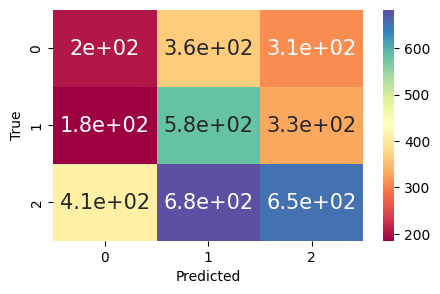

model_RandomForest
              precision    recall  f1-score   support

          -1       0.24      0.73      0.36       877
           0       0.24      0.10      0.14      1096
           1       0.57      0.18      0.27      1744

    accuracy                           0.29      3717
   macro avg       0.35      0.34      0.26      3717
weighted avg       0.39      0.29      0.25      3717



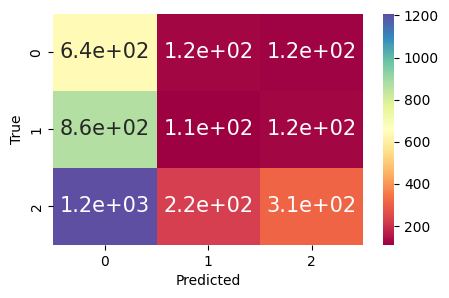

model_SVC
              precision    recall  f1-score   support

          -1       0.23      0.39      0.29       877
           0       0.29      0.14      0.19      1096
           1       0.52      0.50      0.51      1744

    accuracy                           0.37      3717
   macro avg       0.34      0.34      0.33      3717
weighted avg       0.38      0.37      0.36      3717



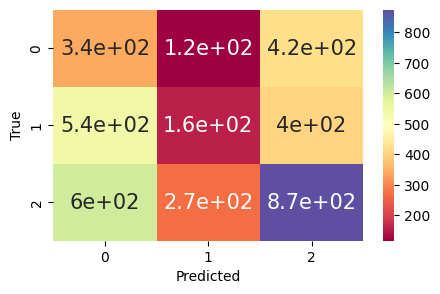

In [10]:
instance2.report()

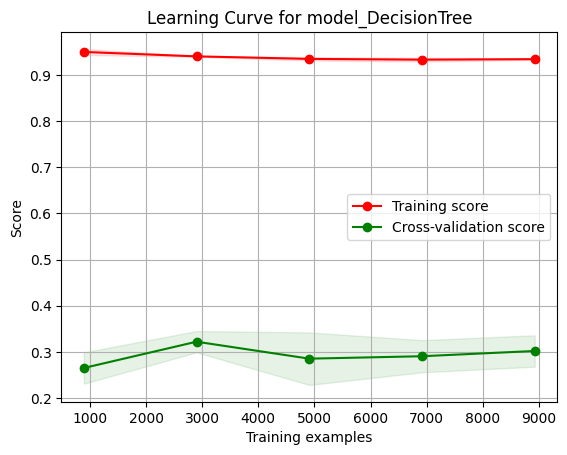

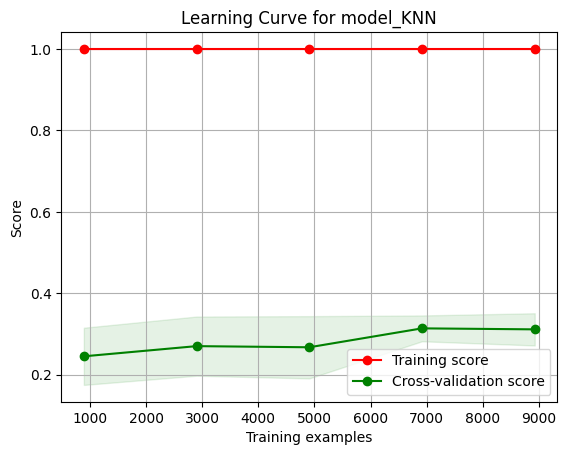

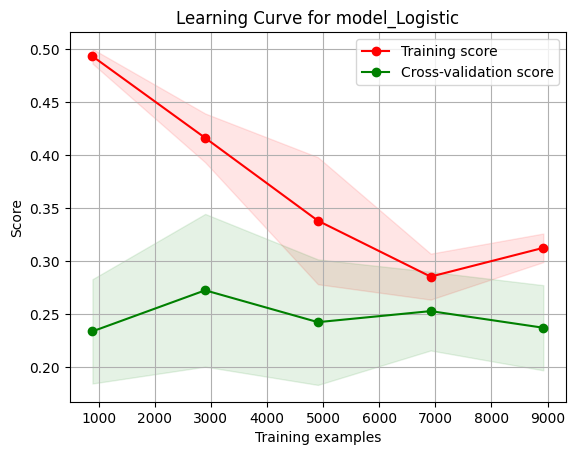

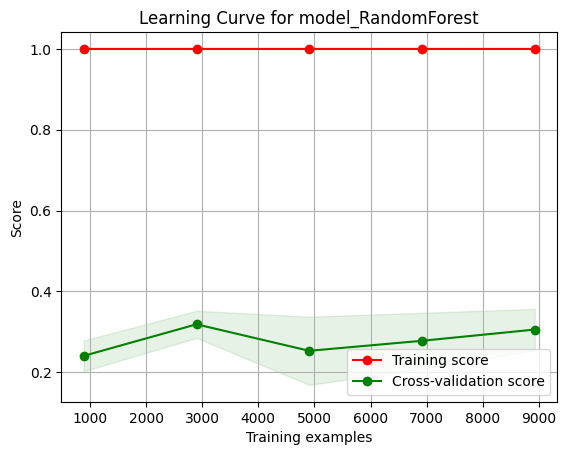

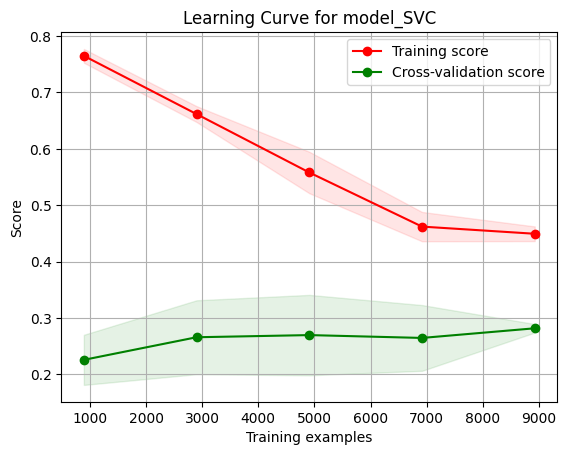

In [11]:
instance2.plot_all_learning_curves()

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE

In [6]:
class single_training():
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.methods = []
        self.models = []
        self.feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"feature_{i}" for i in range(X_train.shape[1])]

    def report(self):
        for num, model in enumerate(self.models):
            print(self.methods[num])
            ypred = model.predict(self.X_test)

            # Classification report
            print(classification_report(self.y_test, ypred))

            # Confusion matrix
            cf_matrix = confusion_matrix(self.y_test, ypred)
            plt.figure(figsize=(5, 3))
            sns.heatmap(cf_matrix, annot=True, annot_kws={"size": 15}, cmap="Spectral")
            plt.ylabel('True')
            plt.xlabel('Predicted')
            plt.show()

            # Feature importance
            if hasattr(model.best_estimator_, 'feature_importances_'):
                importances = model.best_estimator_.feature_importances_
                self.plot_feature_importance(importances, self.feature_names, title=f"Feature Importance for {self.methods[num]}")
            elif hasattr(model.best_estimator_, 'coef_'):
                importances = model.best_estimator_.coef_[0]
                self.plot_feature_importance(importances, self.feature_names, title=f"Feature Importance for {self.methods[num]}")

    def plot_feature_importance(self, importances, feature_names, title="Feature Importance"):
        indices = np.argsort(importances)[::-1]
        plt.figure(figsize=(12, 6))
        plt.title(title)
        plt.bar(range(len(importances)), importances[indices], align='center')
        plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
        plt.tight_layout()
        plt.show()

    def plot_learning_curve(self, estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
        plt.figure()
        plt.title(title)
        plt.xlabel("Training examples")
        plt.ylabel("Score")

        train_sizes, train_scores, test_scores = learning_curve(
            estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1_macro')

        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")

        plt.legend(loc="best")
        plt.show()

    def run(self):
        self.methods = [method for method in dir(self) if callable(getattr(self, method)) and method.startswith("model")]
        print(self.methods)
        self.models = [getattr(self, method_name)() for method_name in self.methods]

    def plot_all_learning_curves(self):
        for num, model in enumerate(self.models):
            self.plot_learning_curve(model.best_estimator_, f"Learning Curve for {self.methods[num]}", self.X_train, self.y_train, cv=5, n_jobs=-1)

    def model_Logistic(self):
        pipe_Logistic = Pipeline([
            ('scaler', StandardScaler()),
            ('Logistic', LogisticRegression(random_state=2024, max_iter=2000, solver='lbfgs'))
        ])
        grid_params_Logistic = {'Logistic__C': [0.01, 0.1, 1, 10, 100], 'Logistic__solver': ['newton-cg', 'lbfgs']}
        self.CV_Logistic = GridSearchCV(estimator=pipe_Logistic, param_grid=grid_params_Logistic, cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)
        self.CV_Logistic.fit(self.X_train, self.y_train)
        return self.CV_Logistic

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     NaN  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     NaN  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     NaN  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     NaN  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     NaN  
Now training 1 days prediction in the future
['model_Logistic']

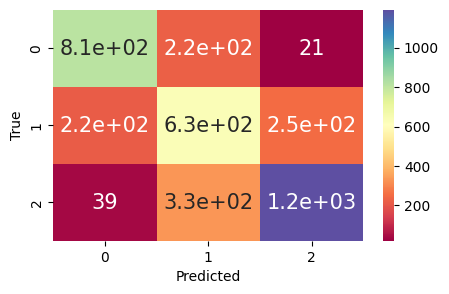

Now plotting 1 days prediction in the future


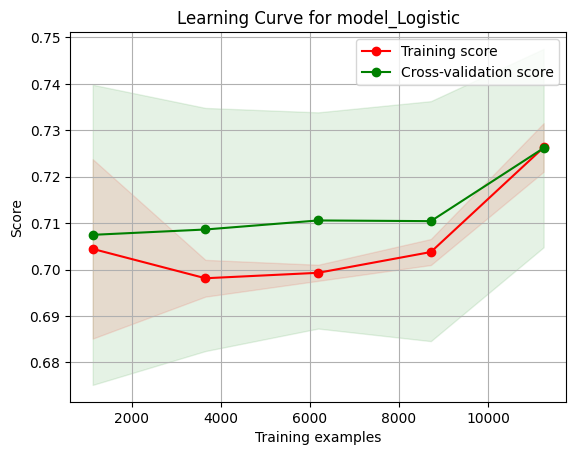

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     NaN  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     NaN  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     NaN  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     NaN  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     NaN  
Now training 2 days prediction in the future
['model_Logistic']

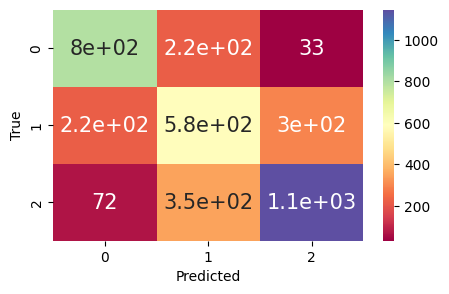

Now plotting 2 days prediction in the future


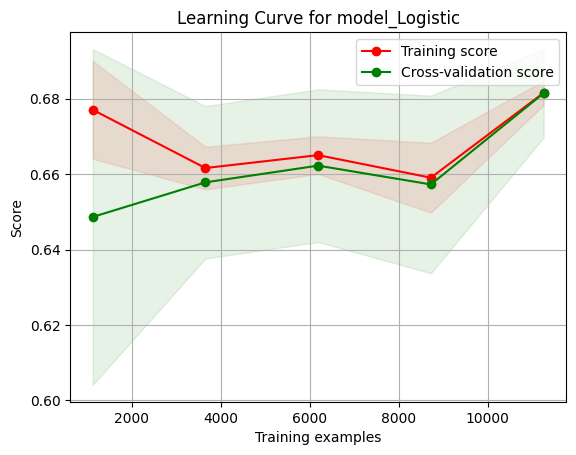

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     NaN  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     NaN  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     NaN  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     NaN  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     NaN  
Now training 3 days prediction in the future
['model_Logistic']

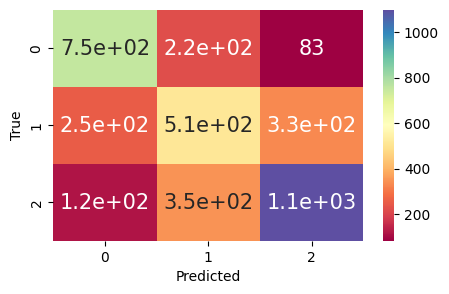

Now plotting 3 days prediction in the future


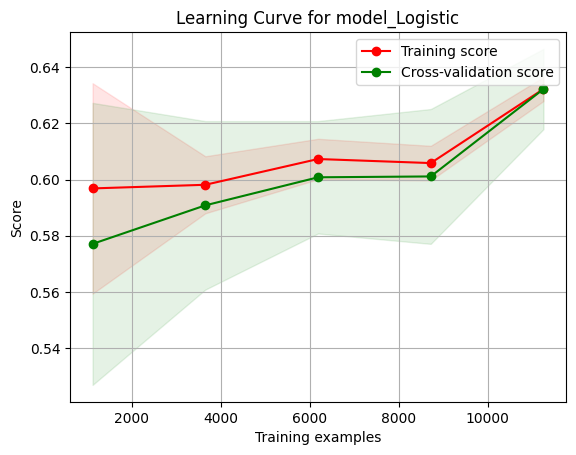

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     NaN  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     NaN  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     NaN  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     NaN  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     NaN  
Now training 4 days prediction in the future
['model_Logistic']

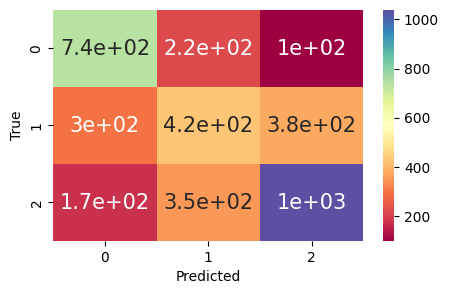

Now plotting 4 days prediction in the future


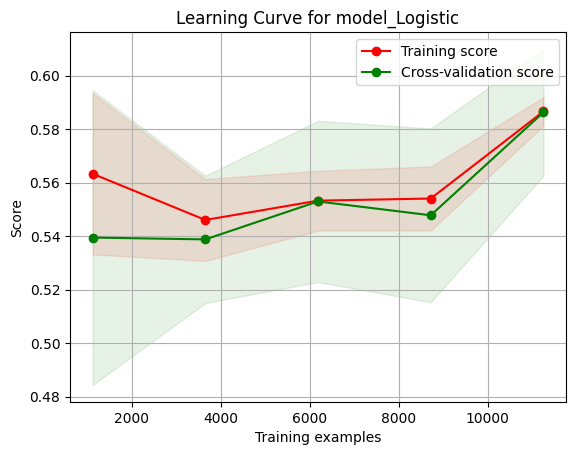

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     NaN  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     NaN  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     NaN  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     NaN  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     NaN  
Now training 5 days prediction in the future
['model_Logistic']

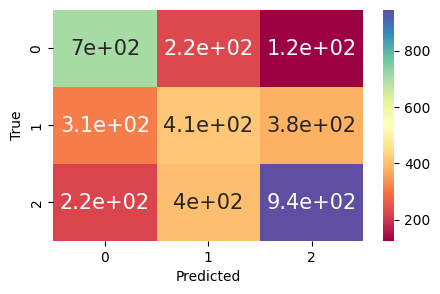

Now plotting 5 days prediction in the future


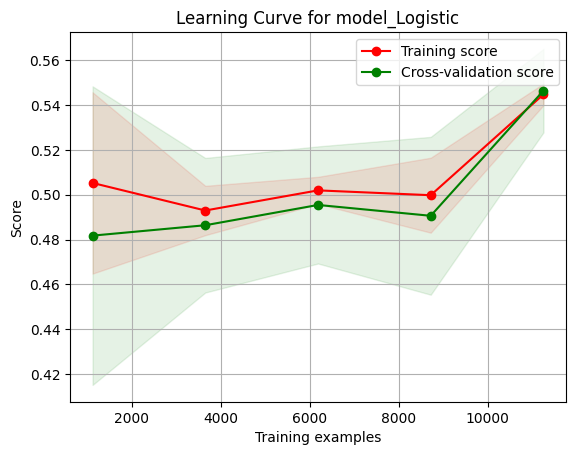

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     NaN  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     NaN  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     NaN  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     NaN  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124    -1.0  
Now training 6 days prediction in the future
['model_Logistic']

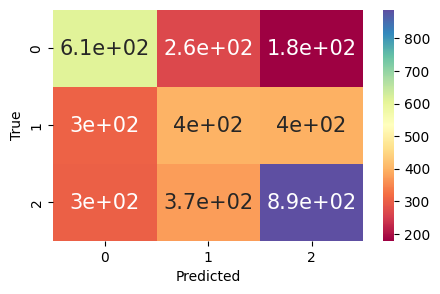

Now plotting 6 days prediction in the future


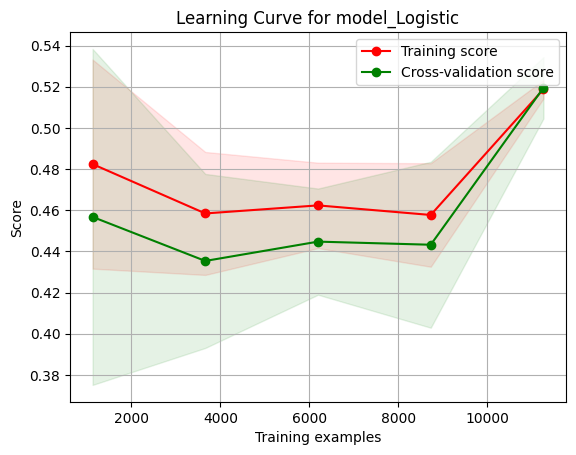

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     NaN  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     NaN  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     NaN  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079    -1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124    -1.0  
Now training 7 days prediction in the future
['model_Logistic']

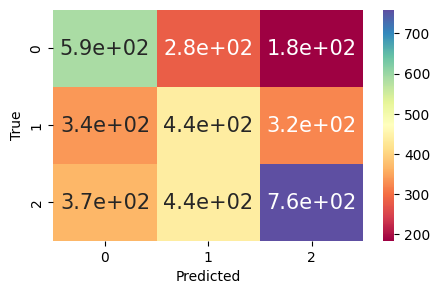

Now plotting 7 days prediction in the future


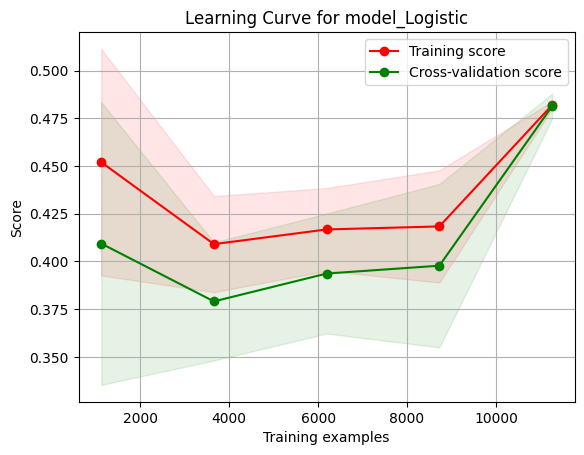

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     NaN  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     NaN  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379    -1.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079    -1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124    -1.0  
Now training 8 days prediction in the future
['model_Logistic']

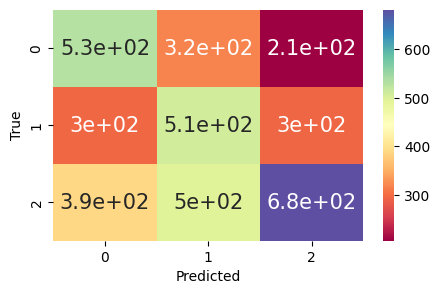

Now plotting 8 days prediction in the future


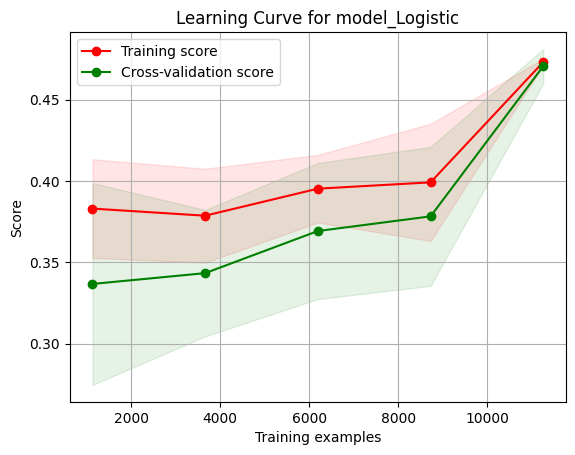

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     NaN  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658    -1.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379    -1.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079    -1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124    -1.0  
Now training 9 days prediction in the future
['model_Logistic']

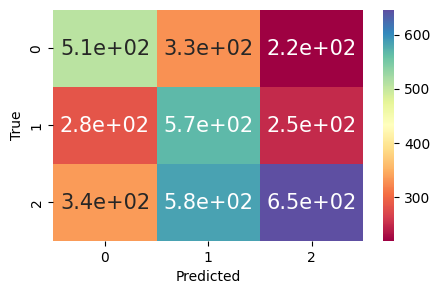

Now plotting 9 days prediction in the future


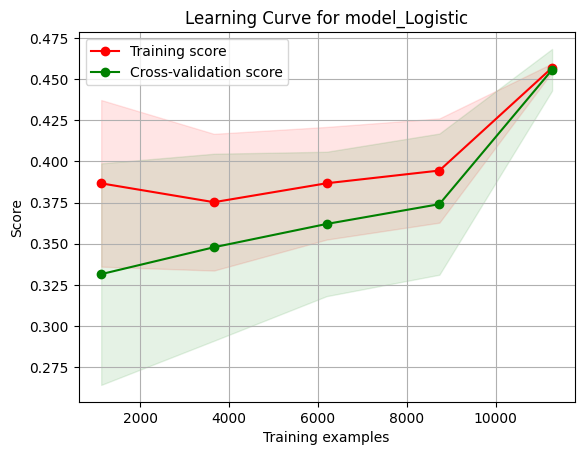

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975      -1  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658      -1  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379      -1  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079      -1  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124       0  
Now training 10 days prediction in the future
['model_Logistic'

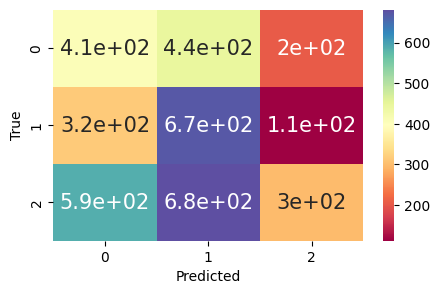

Now plotting 10 days prediction in the future


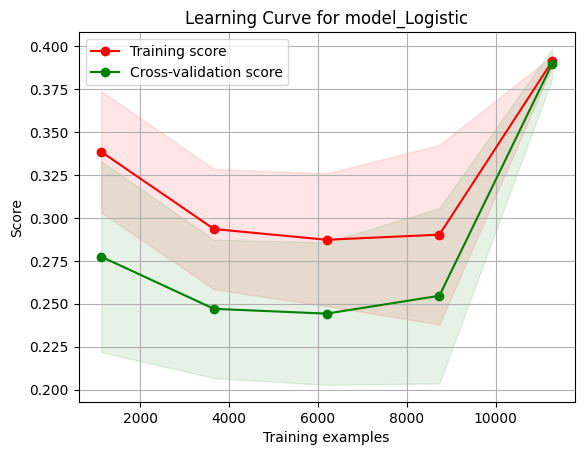

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975    -1.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658    -1.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379    -1.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     0.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124    -1.0  
Now training 11 days prediction in the future
['model_Logistic'

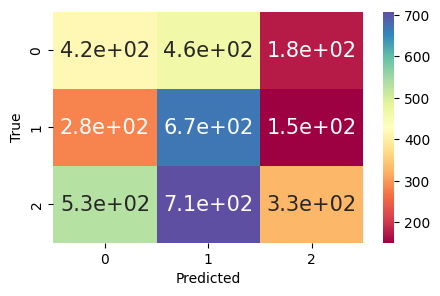

Now plotting 11 days prediction in the future


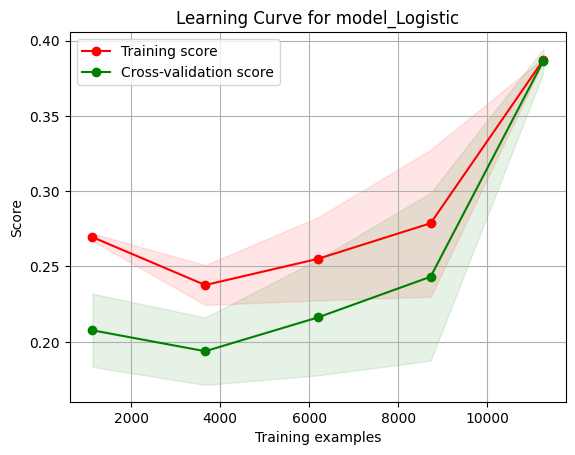

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975    -1.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658    -1.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     0.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079    -1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     0.0  
Now training 12 days prediction in the future
['model_Logistic'

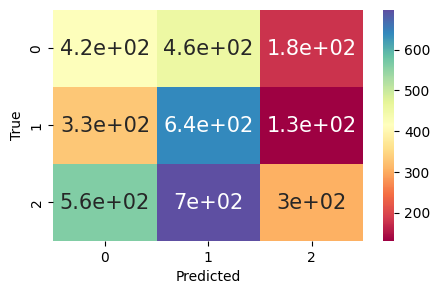

Now plotting 12 days prediction in the future


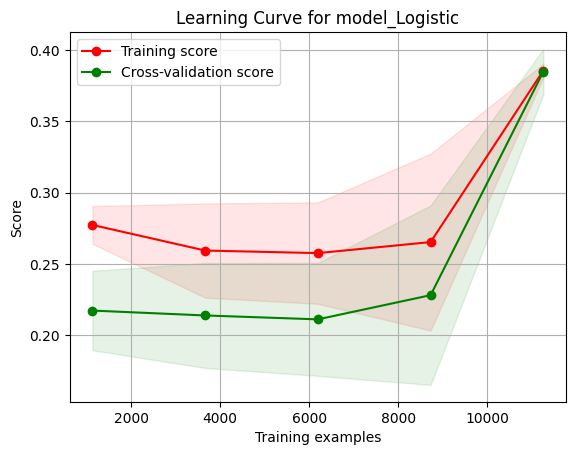

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975    -1.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     0.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379    -1.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     0.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124    -1.0  
Now training 13 days prediction in the future
['model_Logistic'

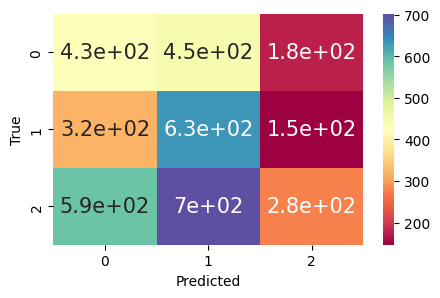

Now plotting 13 days prediction in the future


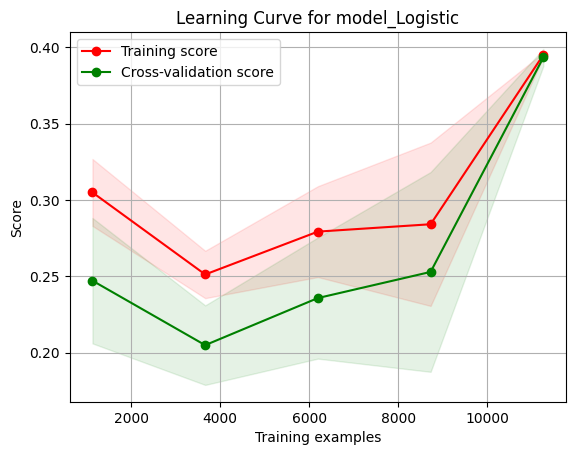

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     0.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658    -1.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     0.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079    -1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124    -1.0  
Now training 14 days prediction in the future
['model_Logistic'

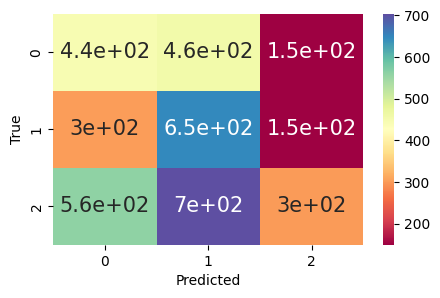

Now plotting 14 days prediction in the future


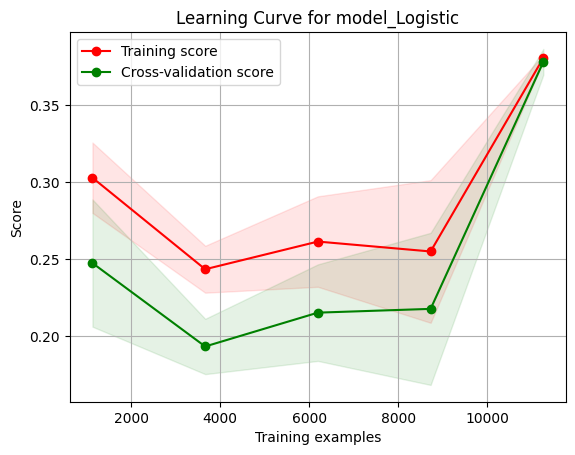

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975    -1.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     0.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379    -1.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079    -1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124    -1.0  
Now training 15 days prediction in the future
['model_Logistic'

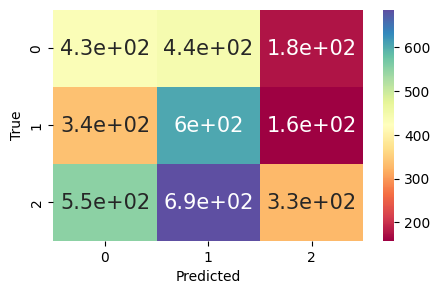

Now plotting 15 days prediction in the future


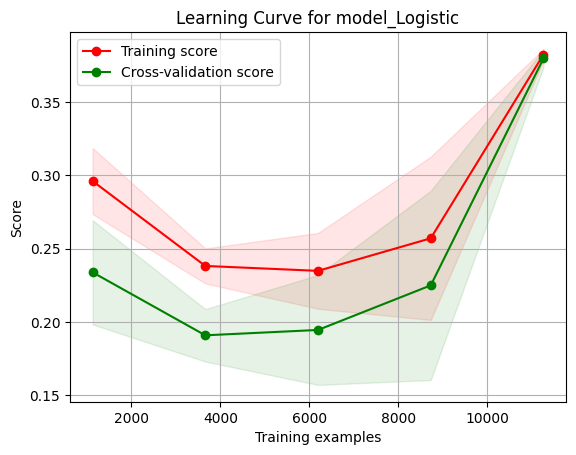

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     0.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658    -1.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379    -1.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079    -1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124    -1.0  
Now training 16 days prediction in the future
['model_Logistic'

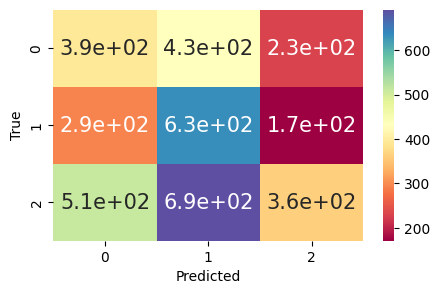

Now plotting 16 days prediction in the future


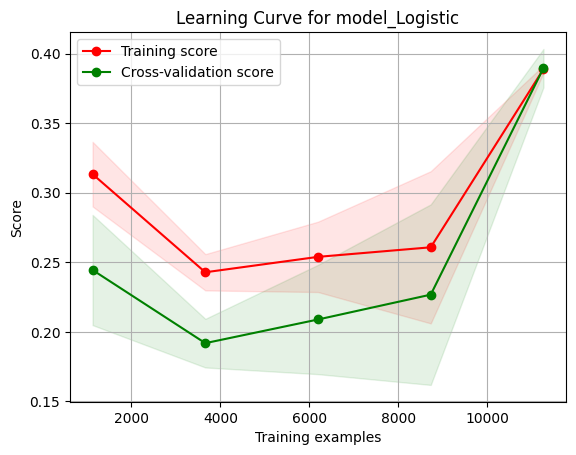

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975    -1.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658    -1.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379    -1.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079    -1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     0.0  
Now training 17 days prediction in the future
['model_Logistic'

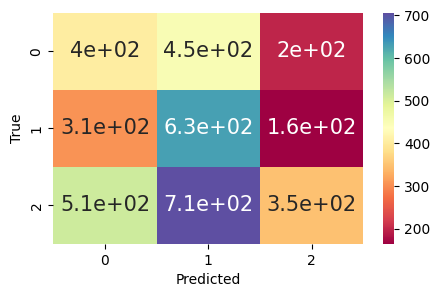

Now plotting 17 days prediction in the future


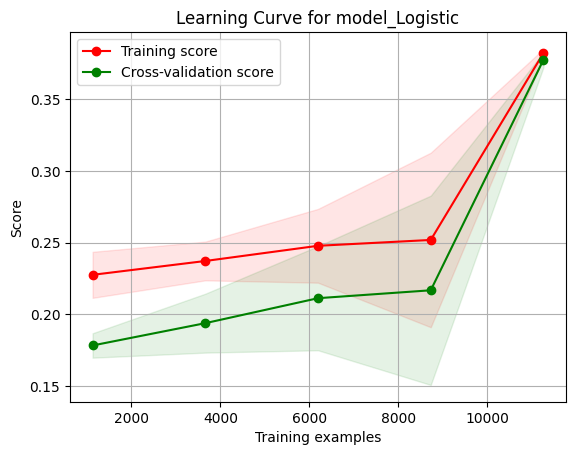

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975    -1.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658    -1.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379    -1.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     0.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     1.0  
Now training 18 days prediction in the future
['model_Logistic'

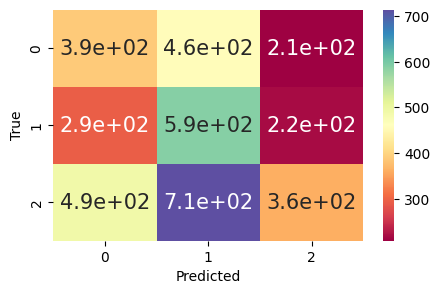

Now plotting 18 days prediction in the future


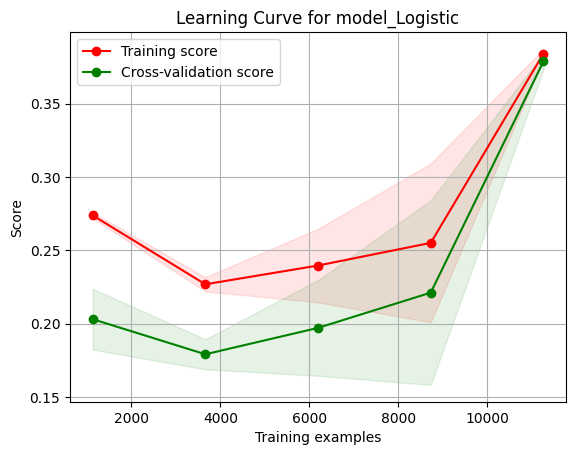

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975    -1.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658    -1.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     0.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     1.0  
Now training 19 days prediction in the future
['model_Logistic'

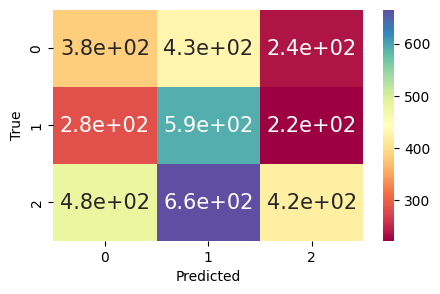

Now plotting 19 days prediction in the future


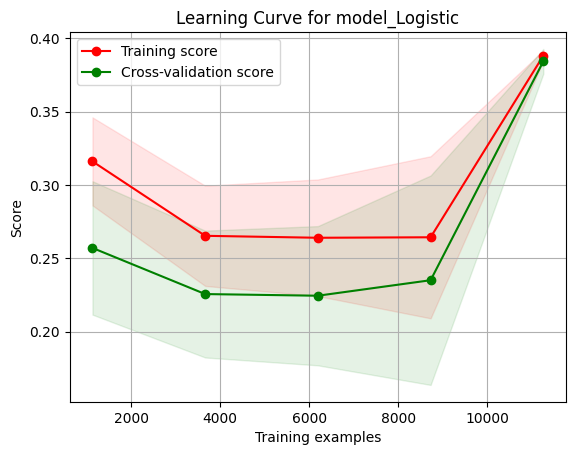

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975    -1.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     0.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     1.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     1.0  
Now training 20 days prediction in the future
['model_Logistic'

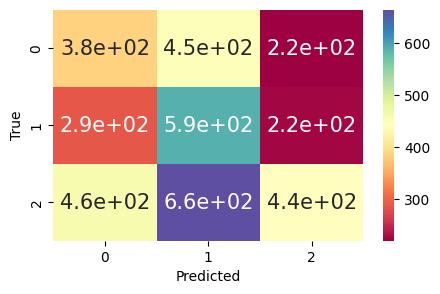

Now plotting 20 days prediction in the future


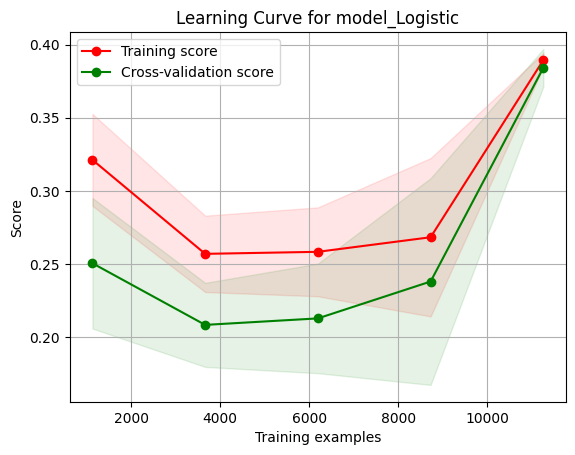

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     0.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     1.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     1.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     1.0  
Now training 21 days prediction in the future
['model_Logistic'

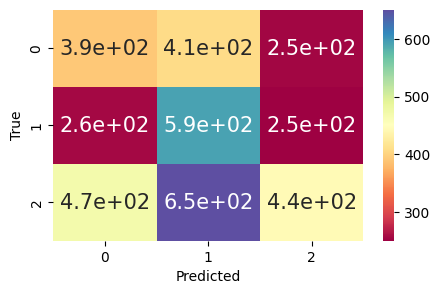

Now plotting 21 days prediction in the future


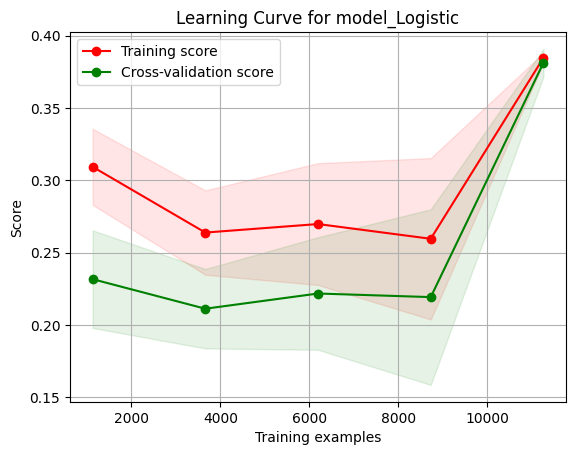

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     1.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     1.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     1.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     1.0  
Now training 22 days prediction in the future
['model_Logistic'

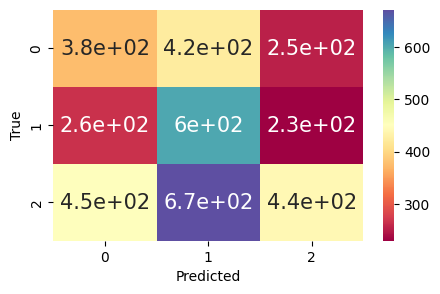

Now plotting 22 days prediction in the future


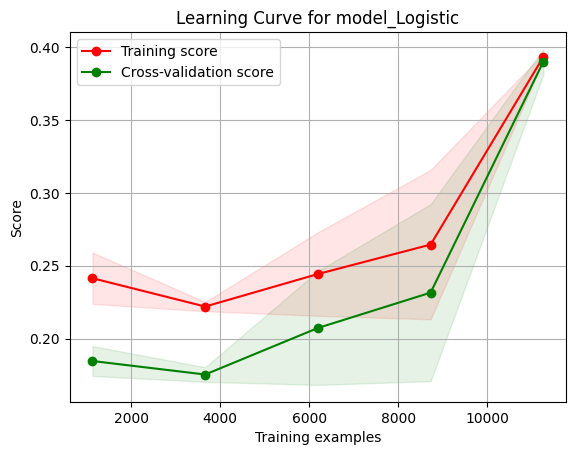

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     1.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     1.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     1.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     1.0  
Now training 23 days prediction in the future
['model_Logistic'

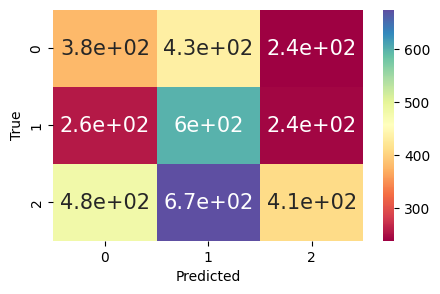

Now plotting 23 days prediction in the future


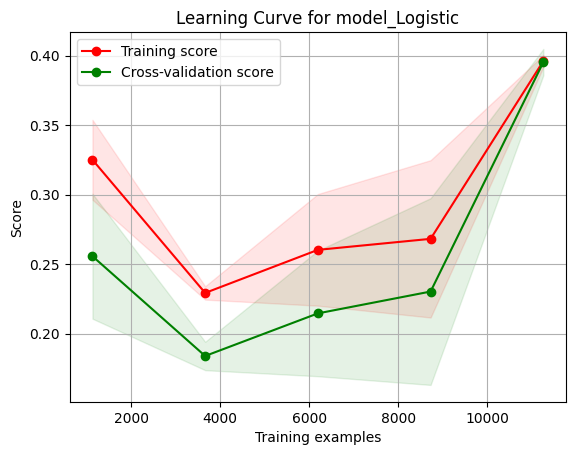

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     1.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     1.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     1.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     1.0  
Now training 24 days prediction in the future
['model_Logistic'

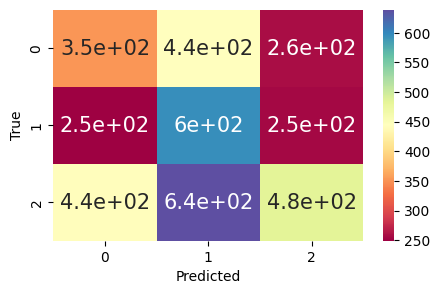

Now plotting 24 days prediction in the future


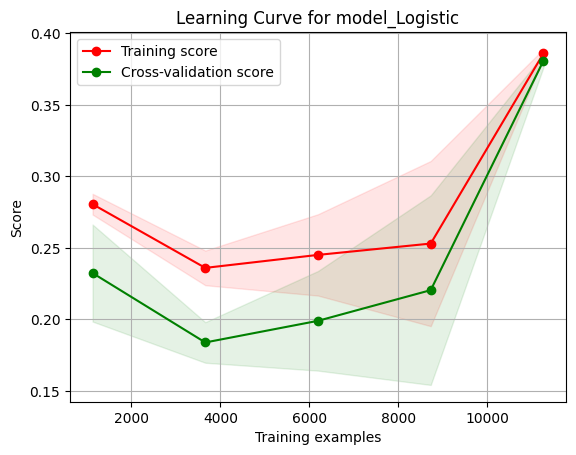

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     1.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     1.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     1.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     1.0  
Now training 25 days prediction in the future
['model_Logistic'

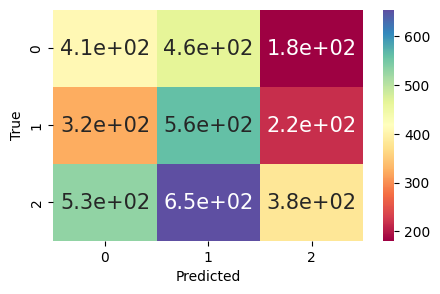

Now plotting 25 days prediction in the future


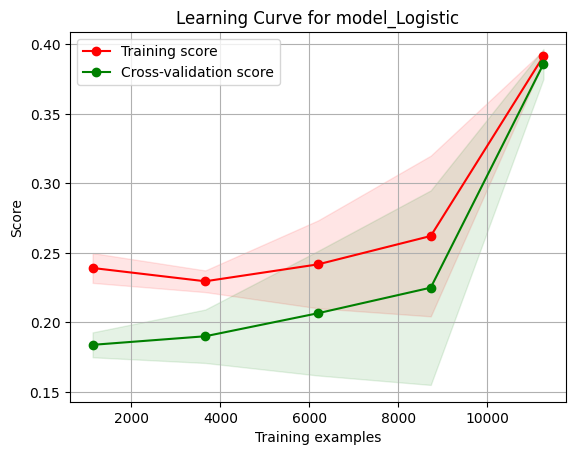

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     1.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     1.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     1.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     1.0  
Now training 26 days prediction in the future
['model_Logistic'

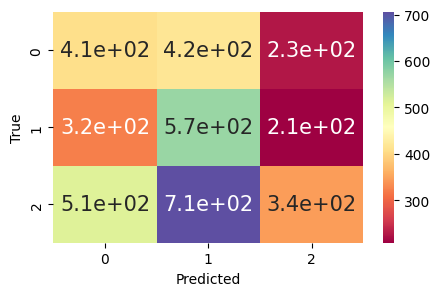

Now plotting 26 days prediction in the future


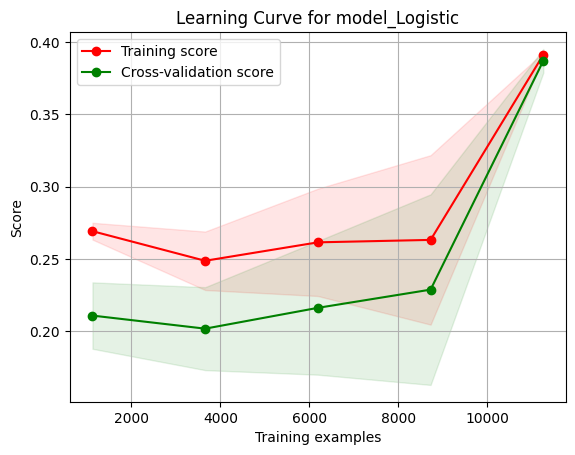

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     1.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     1.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     1.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     1.0  
Now training 27 days prediction in the future
['model_Logistic'

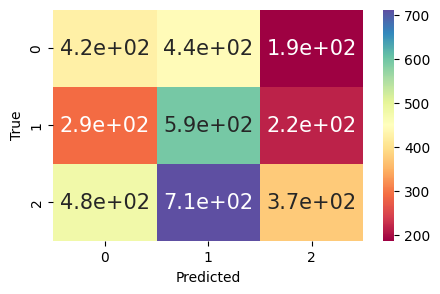

Now plotting 27 days prediction in the future


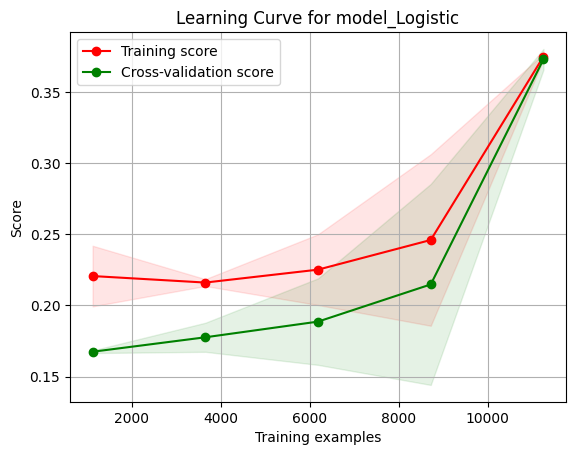

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     1.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     1.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     1.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     1.0  
Now training 28 days prediction in the future
['model_Logistic'

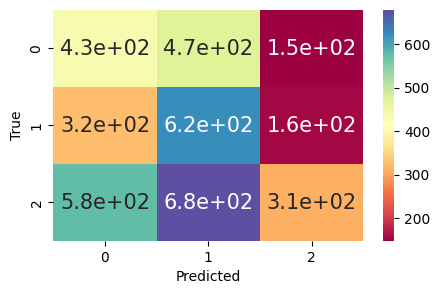

Now plotting 28 days prediction in the future


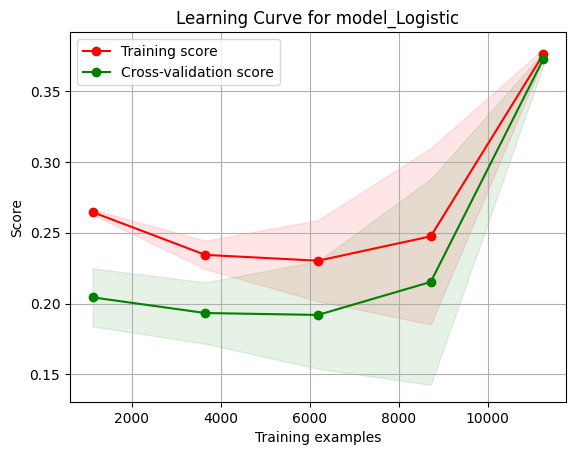

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     1.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     1.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     1.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     1.0  
Now training 29 days prediction in the future
['model_Logistic'

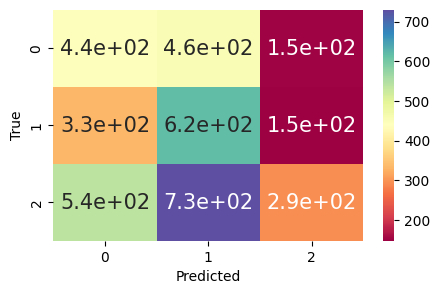

Now plotting 29 days prediction in the future


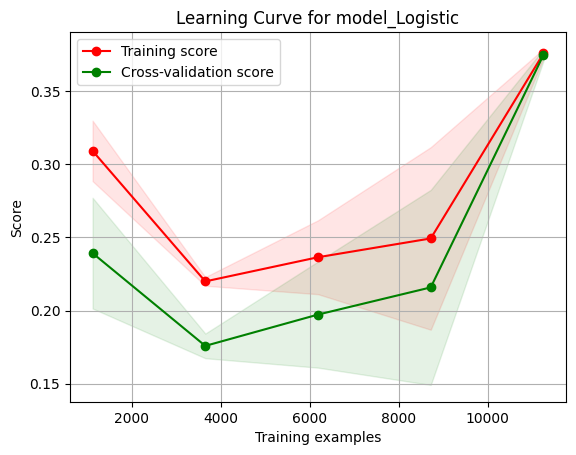

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     1.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     1.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     1.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     0.0  
Now training 30 days prediction in the future
['model_Logistic'

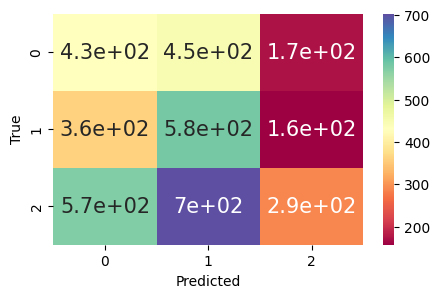

Now plotting 30 days prediction in the future


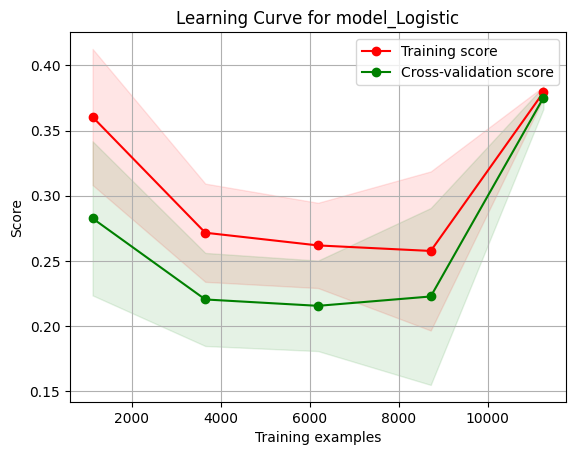

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     1.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     1.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     1.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     0.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     1.0  
Now training 31 days prediction in the future
['model_Logistic'

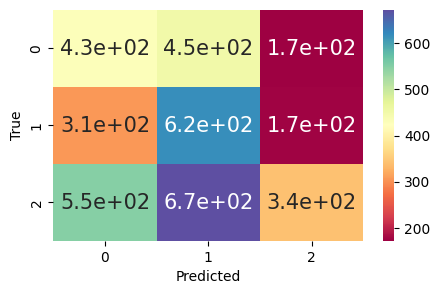

Now plotting 31 days prediction in the future


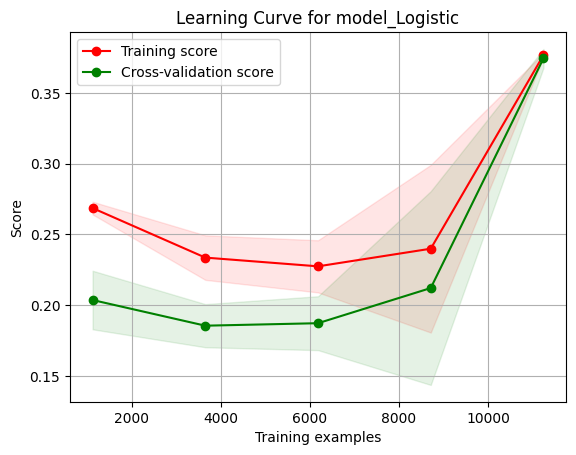

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     1.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     1.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     0.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     0.0  
Now training 32 days prediction in the future
['model_Logistic'

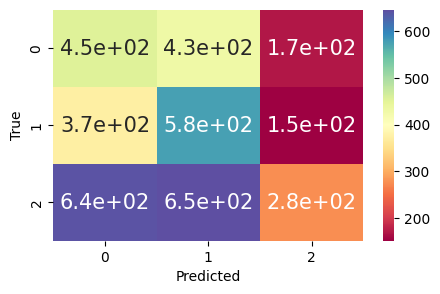

Now plotting 32 days prediction in the future


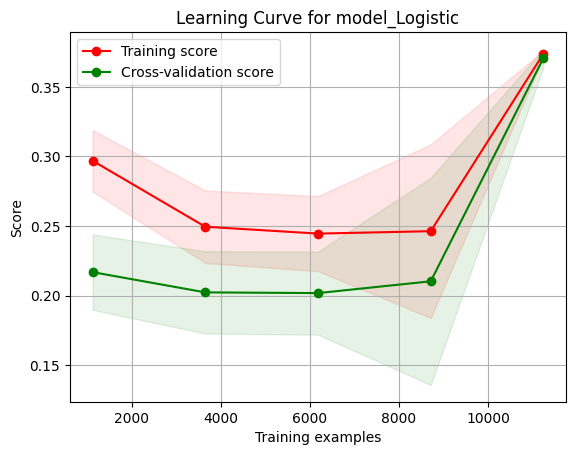

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     1.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     0.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     1.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     0.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     0.0  
Now training 33 days prediction in the future
['model_Logistic'

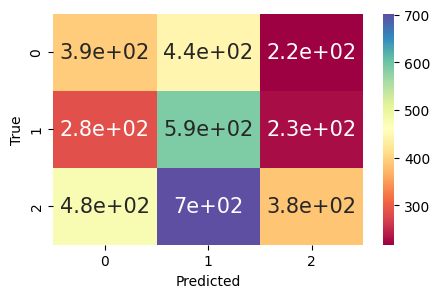

Now plotting 33 days prediction in the future


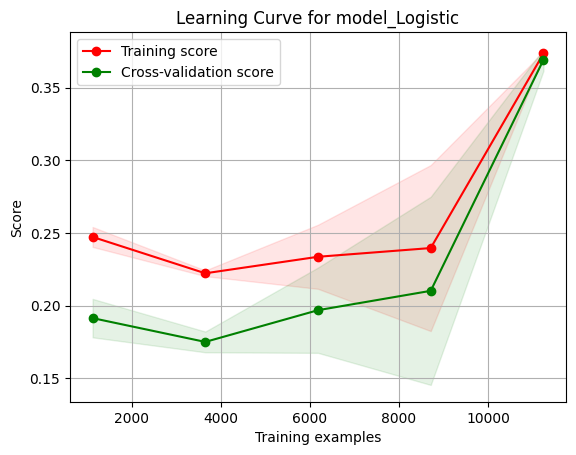

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     0.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     1.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     0.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     0.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124    -1.0  
Now training 34 days prediction in the future
['model_Logistic'

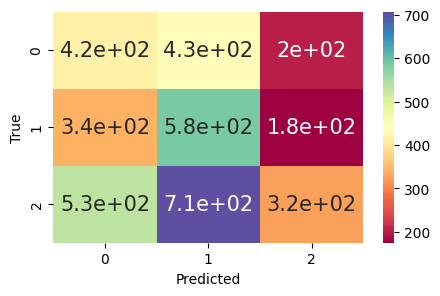

Now plotting 34 days prediction in the future


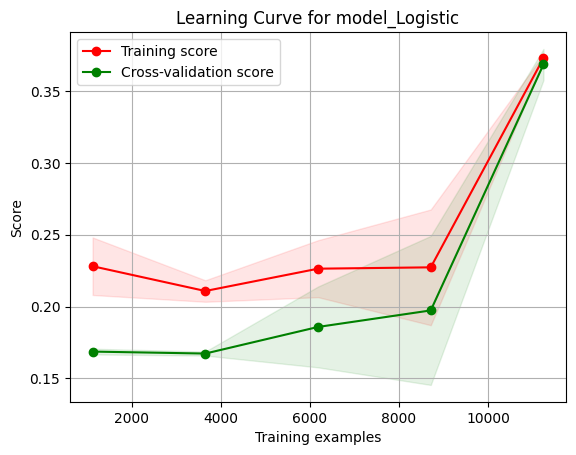

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     1.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     0.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     0.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079    -1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     0.0  
Now training 35 days prediction in the future
['model_Logistic'

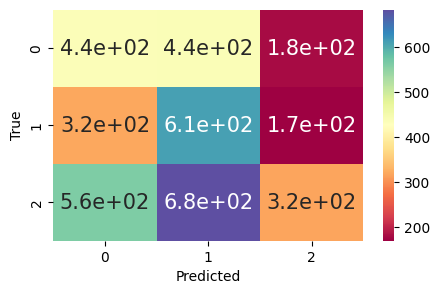

Now plotting 35 days prediction in the future


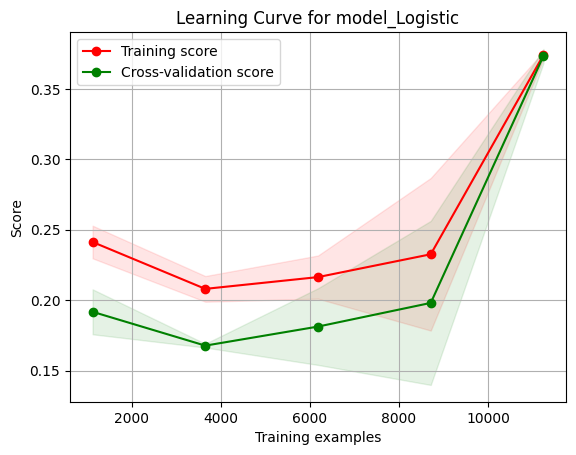

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     0.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     0.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379    -1.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     0.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     0.0  
Now training 36 days prediction in the future
['model_Logistic'

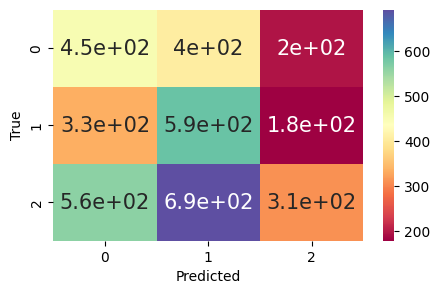

Now plotting 36 days prediction in the future


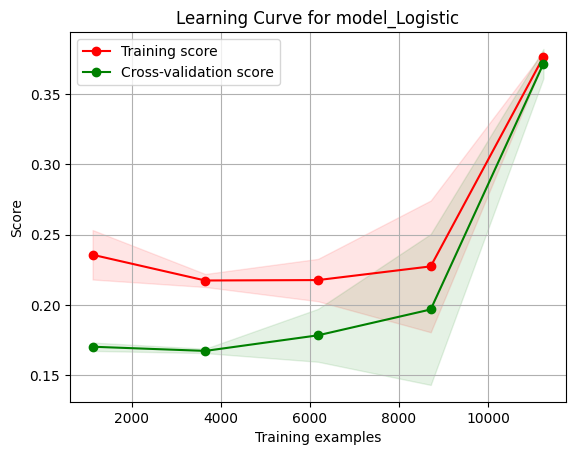

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     0.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658    -1.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     0.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     0.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     0.0  
Now training 37 days prediction in the future
['model_Logistic'

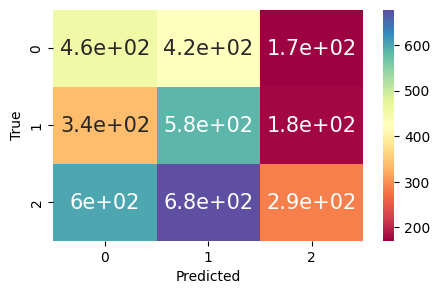

Now plotting 37 days prediction in the future


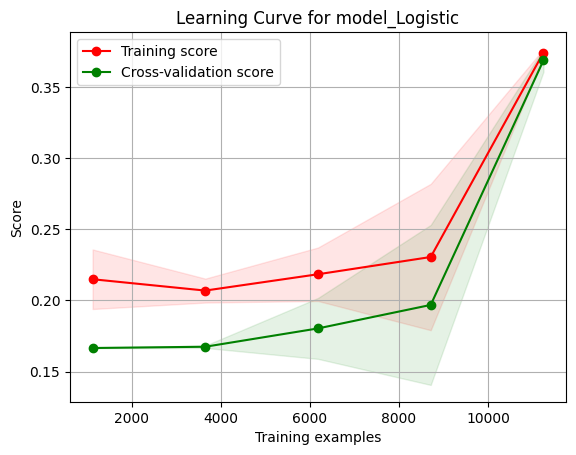

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975    -1.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     0.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     0.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     0.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     0.0  
Now training 38 days prediction in the future
['model_Logistic'

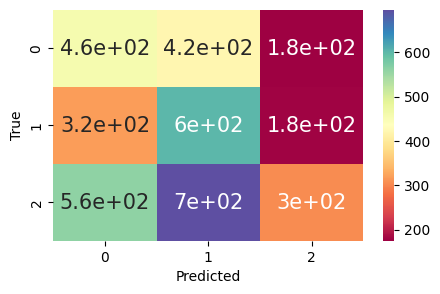

Now plotting 38 days prediction in the future


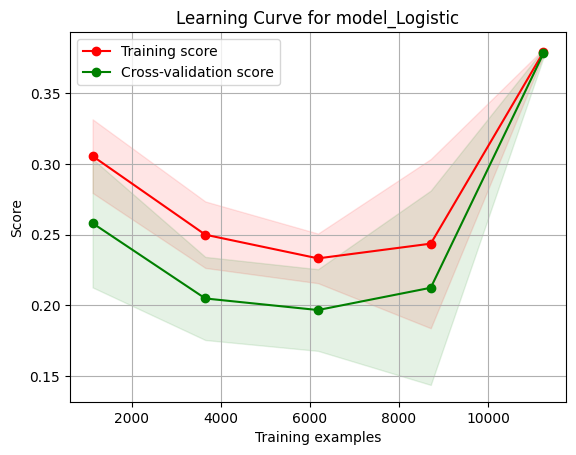

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     0.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     0.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     0.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     0.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     0.0  
Now training 39 days prediction in the future
['model_Logistic'

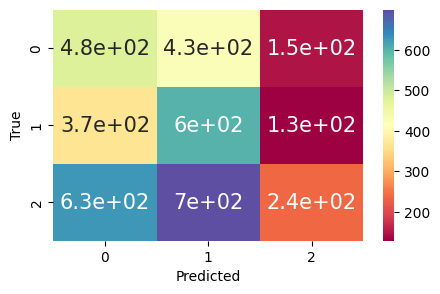

Now plotting 39 days prediction in the future


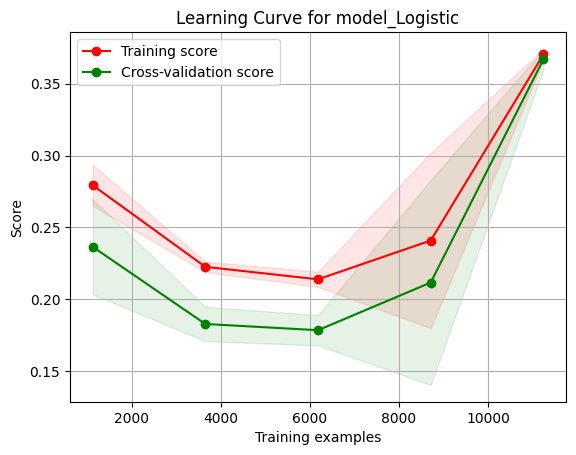

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     0.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     0.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     0.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     0.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     0.0  
Now training 40 days prediction in the future
['model_Logistic'

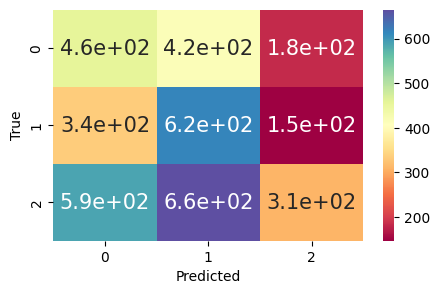

Now plotting 40 days prediction in the future


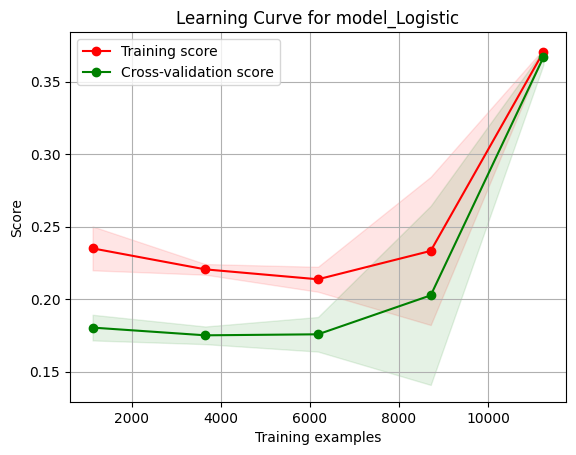

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     0.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     0.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     0.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     0.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124    -1.0  
Now training 41 days prediction in the future
['model_Logistic'

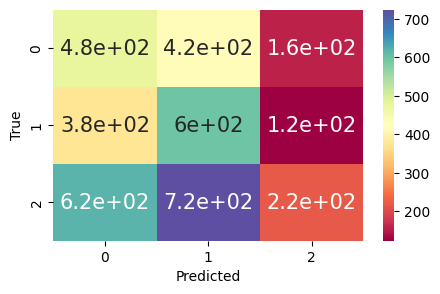

Now plotting 41 days prediction in the future


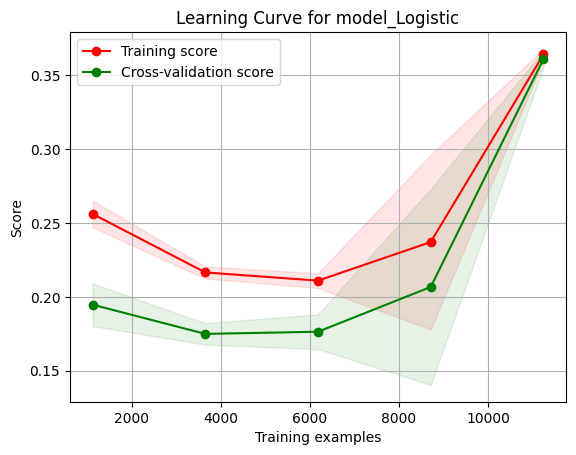

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     0.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     0.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     0.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079    -1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     0.0  
Now training 42 days prediction in the future
['model_Logistic'

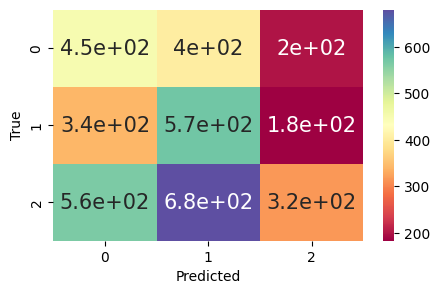

Now plotting 42 days prediction in the future


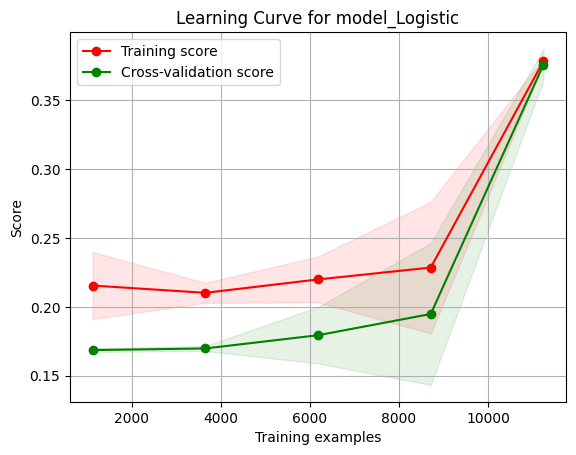

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     0.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     0.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379    -1.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     0.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     0.0  
Now training 43 days prediction in the future
['model_Logistic'

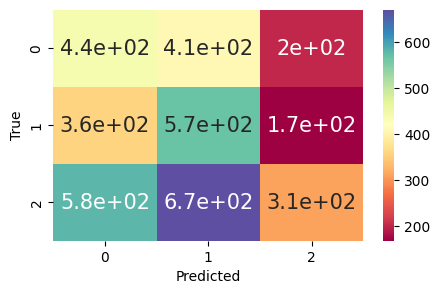

Now plotting 43 days prediction in the future


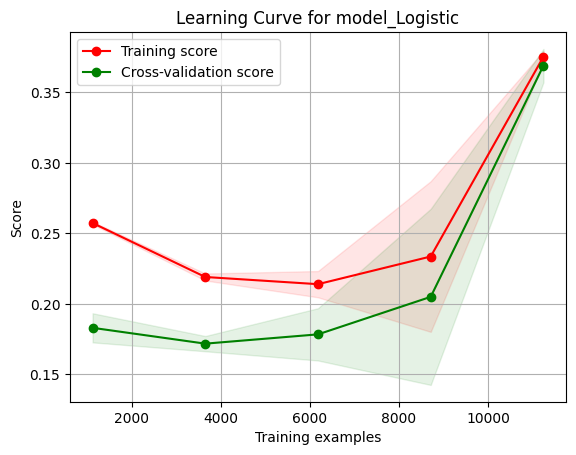

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     0.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658    -1.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     0.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     0.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     0.0  
Now training 44 days prediction in the future
['model_Logistic'

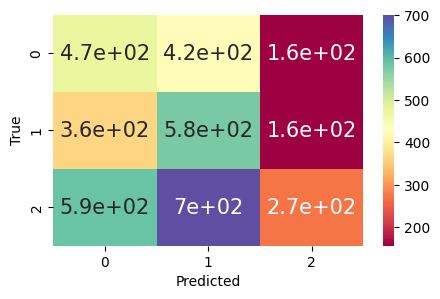

Now plotting 44 days prediction in the future


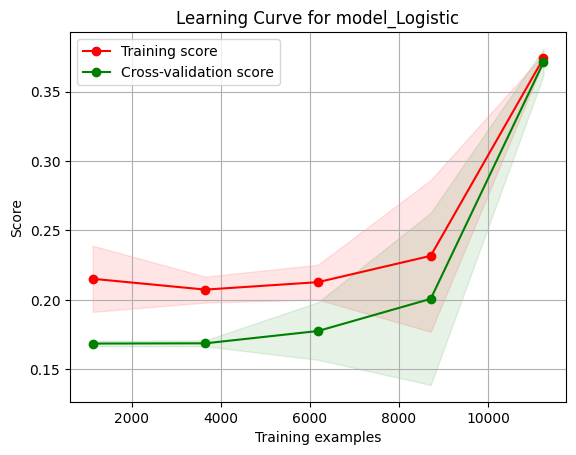

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975    -1.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     0.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     0.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     0.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     1.0  
Now training 45 days prediction in the future
['model_Logistic'

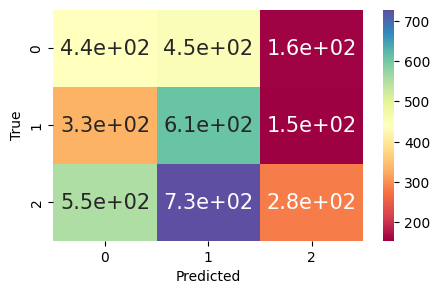

Now plotting 45 days prediction in the future


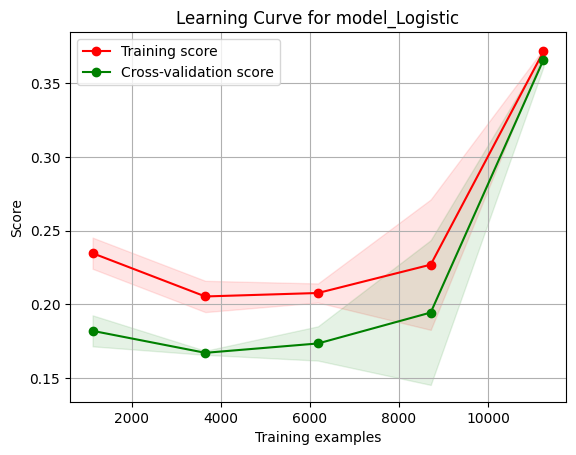

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     0.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     0.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     0.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     1.0  
Now training 46 days prediction in the future
['model_Logistic'

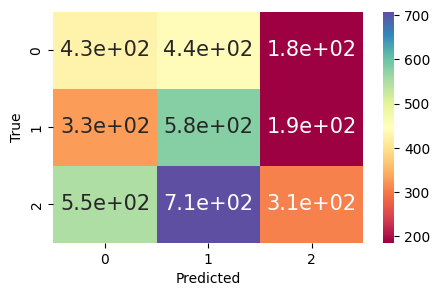

Now plotting 46 days prediction in the future


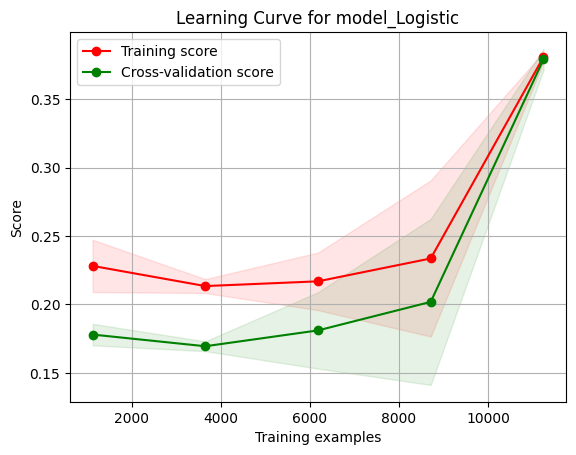

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     0.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     0.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     1.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     1.0  
Now training 47 days prediction in the future
['model_Logistic'

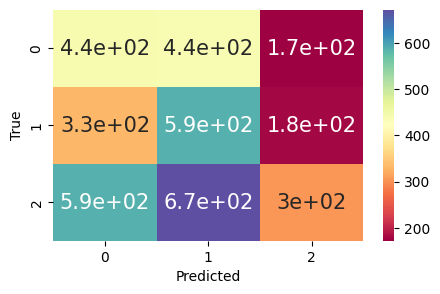

Now plotting 47 days prediction in the future


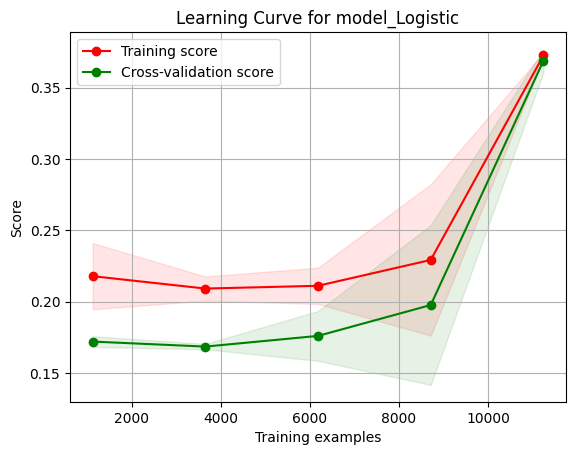

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     0.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     1.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     1.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     1.0  
Now training 48 days prediction in the future
['model_Logistic'

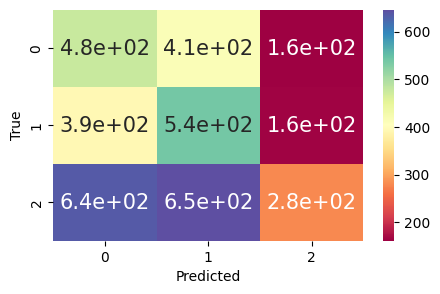

Now plotting 48 days prediction in the future


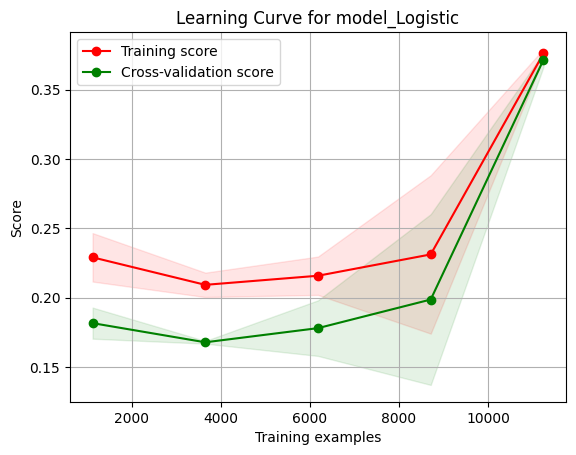

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     1.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     1.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     1.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     1.0  
Now training 49 days prediction in the future
['model_Logistic'

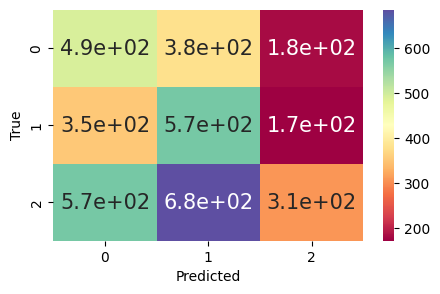

Now plotting 49 days prediction in the future


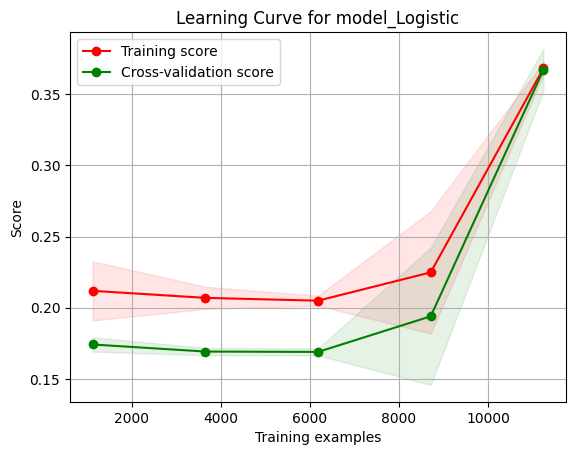

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     1.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     1.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     1.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     1.0  
Now training 50 days prediction in the future
['model_Logistic'

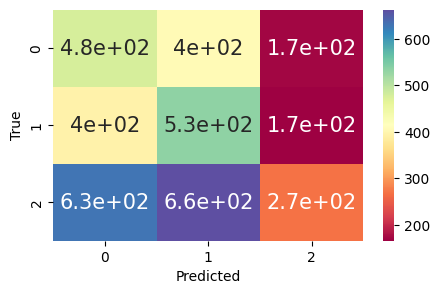

Now plotting 50 days prediction in the future


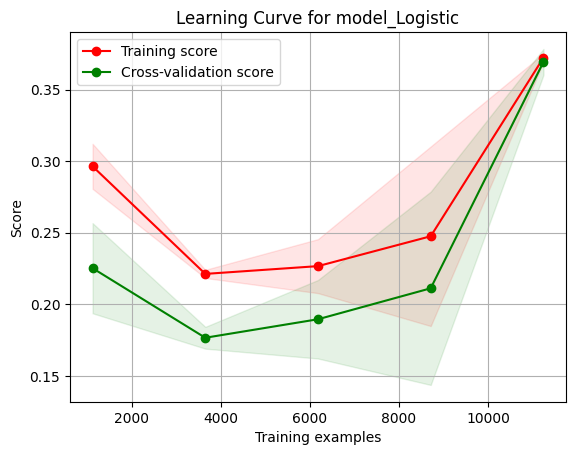

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     1.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     1.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     1.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     0.0  
Now training 51 days prediction in the future
['model_Logistic'

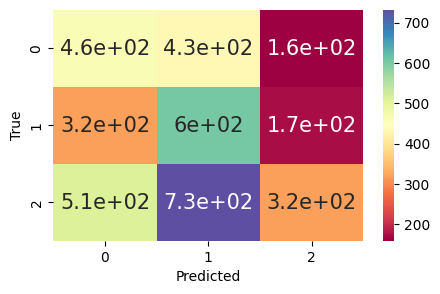

Now plotting 51 days prediction in the future


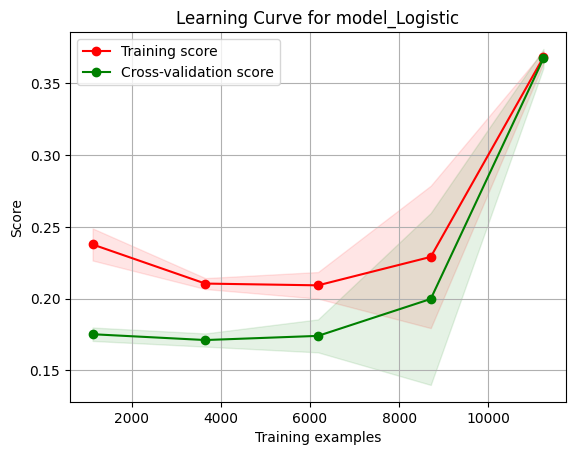

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     1.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     1.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     1.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     0.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     0.0  
Now training 52 days prediction in the future
['model_Logistic'

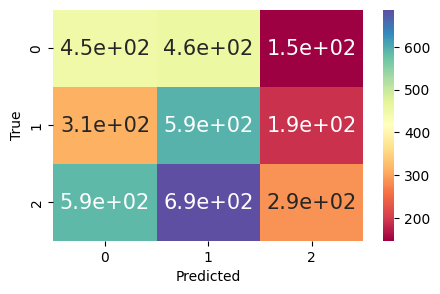

Now plotting 52 days prediction in the future


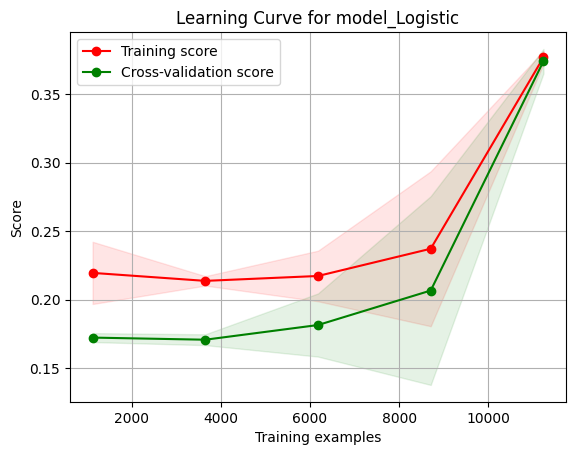

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     1.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     1.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     0.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     0.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124     0.0  
Now training 53 days prediction in the future
['model_Logistic'

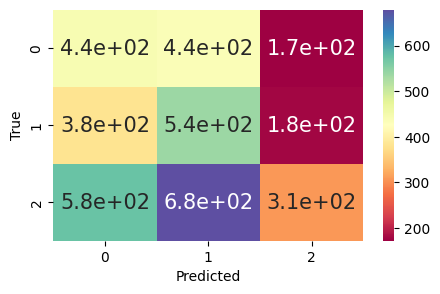

Now plotting 53 days prediction in the future


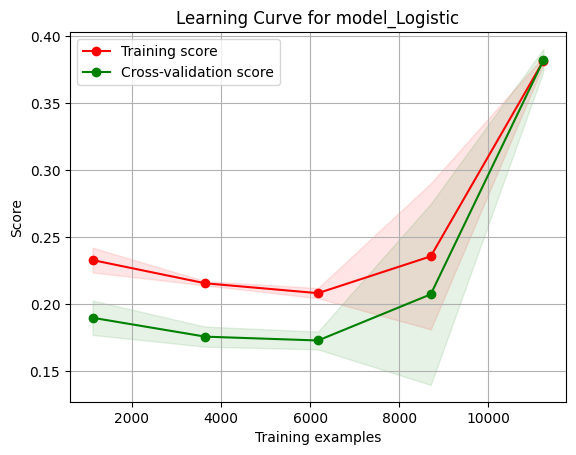

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     1.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     0.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     0.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079     0.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124    -1.0  
Now training 54 days prediction in the future
['model_Logistic'

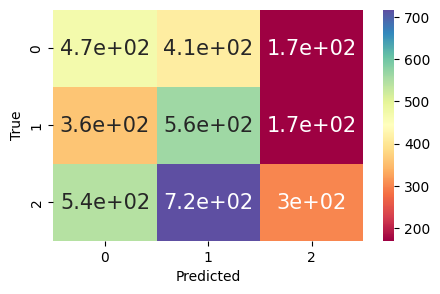

Now plotting 54 days prediction in the future


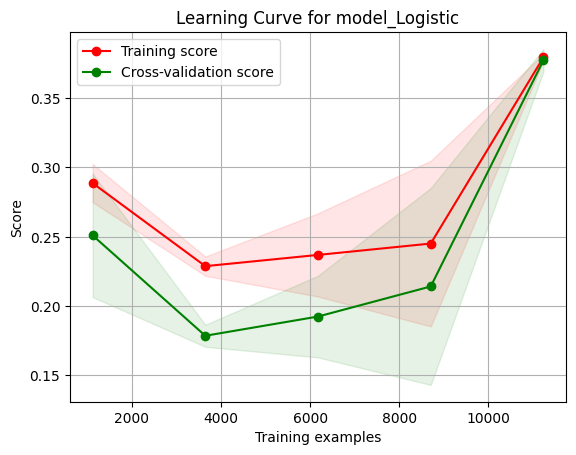

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     0.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     0.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379     0.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079    -1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124    -1.0  
Now training 55 days prediction in the future
['model_Logistic'

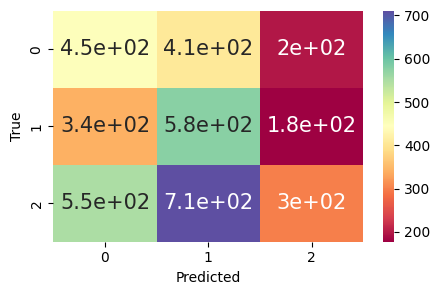

Now plotting 55 days prediction in the future


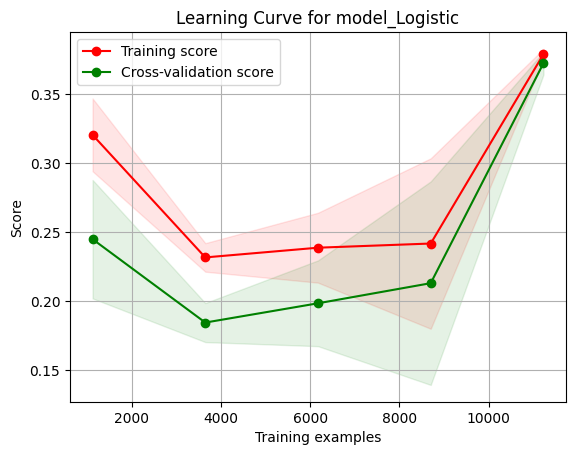

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     0.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658     0.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379    -1.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079    -1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124    -1.0  
Now training 56 days prediction in the future
['model_Logistic'

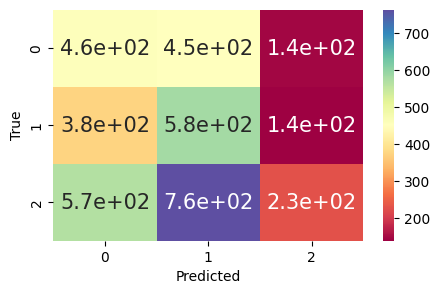

Now plotting 56 days prediction in the future


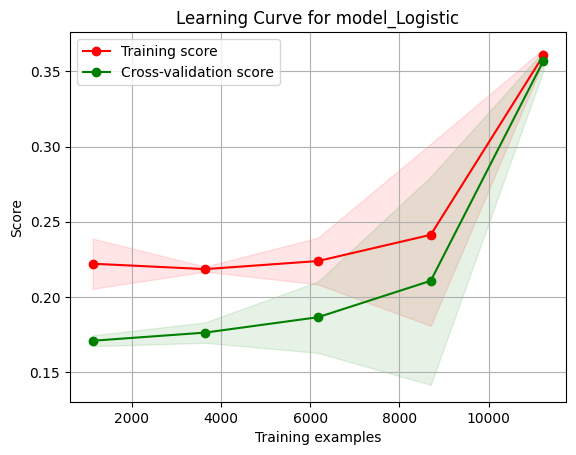

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975     0.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658    -1.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379    -1.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079    -1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124    -1.0  
Now training 57 days prediction in the future
['model_Logistic'

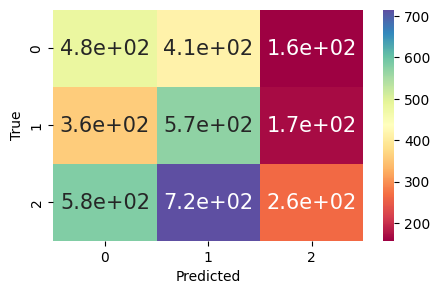

Now plotting 57 days prediction in the future


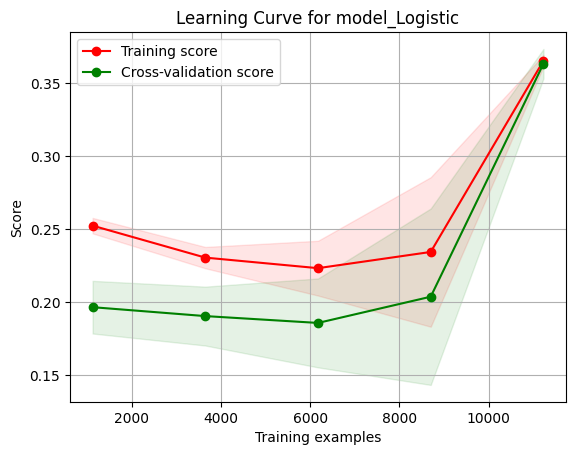

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975    -1.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658    -1.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379    -1.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079    -1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124    -1.0  
Now training 58 days prediction in the future
['model_Logistic'

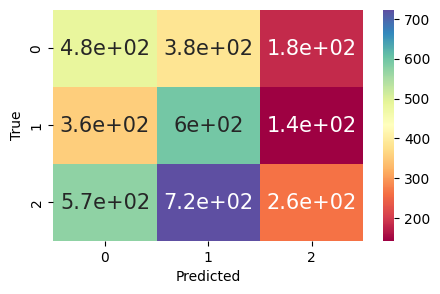

Now plotting 58 days prediction in the future


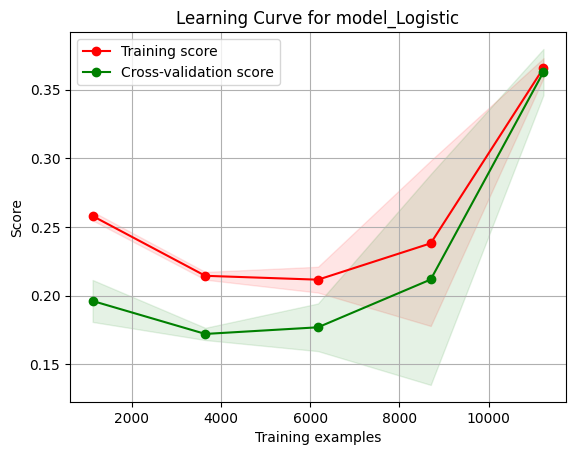

        High        Low      Close   Volume        RSI      MACD  MACD_Signal  \
0  71.959999  70.709999  70.959999  3120000  43.966599  0.053701     0.189011   
1  71.480003  70.379997  71.129997  3590000  46.740876  0.026092     0.156427   
2  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925     0.118157   
3  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508     0.062424   
4  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148    -0.010090   

   MACD_Diff    Change        Up      Down  Delta_SMA  Delta_EMA  Target  
0  -0.135310 -0.008315  0.014092 -0.003523   0.860401   0.696975    -1.0  
1  -0.130335  0.002390  0.004921 -0.010544   0.762800   0.651658    -1.0  
2  -0.153082 -0.006937  0.013873 -0.002690   0.645500   0.582379    -1.0  
3  -0.222932 -0.014068  0.016939 -0.004450   0.497001   0.465079    -1.0  
4  -0.290057 -0.007813  0.010417 -0.013744   0.345201   0.331124    -1.0  
Now training 59 days prediction in the future
['model_Logistic'

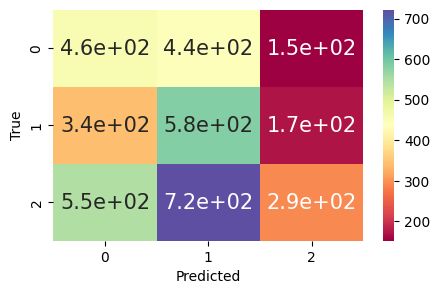

Now plotting 59 days prediction in the future


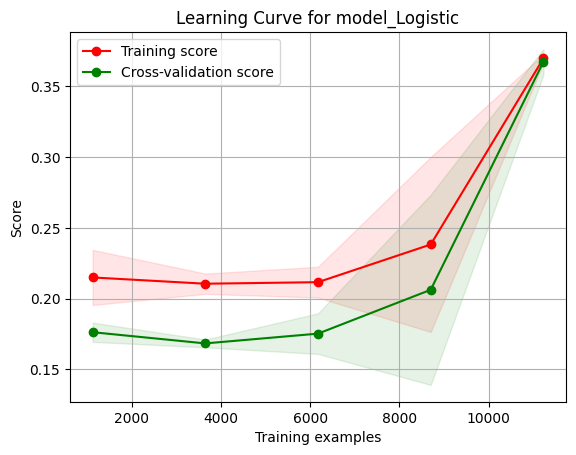

In [12]:

for i in range(-9,50):
    shifted_data = data.copy()
    shifted_data['Target'] = shifted_data['Target'].shift(-i)
    
    print(shifted_data.head())
    shifted_data = shifted_data.dropna()
    
    X = shifted_data.drop('Target', axis=1)
    y = shifted_data['Target']
    
    # Balance the classes using SMOTE
    smote = SMOTE(random_state=2024)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, stratify=y)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    instance = single_training(X_resampled, y_resampled, X_test, y_test)
    print(f'Now training {i + 10} days prediction in the future')
    instance.run()
    print(f'Now finishing training {i + 10} days prediction in the future')
    print(f'Now evaluating {i + 10} days prediction in the future')
    instance.report()
    print(f'Now plotting {i + 10} days prediction in the future')
    instance.plot_all_learning_curves()
    
    